In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("CREMP_SCOR_RawData_2023.csv")

In [6]:
data.head()

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,SPP_CODE,sciName,Diameter_cm,Height_cm,Percent_old_mortality,Percent_recent_mortality,Tissue_isolates,Conditions,LTA_cm2
0,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,3,0.0,0.0,1.0,NaN,56.54
1,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,3,0.0,0.0,1.0,NaN,56.54
2,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,9,4,0.0,0.0,1.0,NaN,117.92
3,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,4,3,0.0,0.0,1.0,NaN,33.83
4,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,4,3,0.0,0.0,1.0,NaN,33.83


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136061 entries, 0 to 136060
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      136061 non-null  int64  
 1   Date                      136061 non-null  object 
 2   Subregion                 136061 non-null  object 
 3   Habitat                   136061 non-null  object 
 4   SiteID                    136061 non-null  int64  
 5   Site_name                 136061 non-null  object 
 6   StationID                 136061 non-null  int64  
 7   SPP_CODE                  136061 non-null  object 
 8   sciName                   136061 non-null  object 
 9   Diameter_cm               136061 non-null  int64  
 10  Height_cm                 136061 non-null  int64  
 11  Percent_old_mortality     136016 non-null  float64
 12  Percent_recent_mortality  136024 non-null  float64
 13  Tissue_isolates           134295 non-null  f

In [26]:
data['Conditions'].unique()

array([nan, 'PAL;', 'PBL;', 'CLN;', 'WPL;', 'PAL;OTH;', 'OTH;',
       'OTH;SED;', 'DSD;', 'SKA;OTH;', 'PAL;CLN;CDL;', 'PRD;', 'DSD;PRD;',
       'SED;', 'BBD;', 'OTH;OTH;UNK;', 'CLN;CDL;', 'OTH;UNK;', 'WPL;OTH;',
       'PAL;SED;', 'WBD;', 'BLH;', 'OTH;OTH;', 'WPL;CLN;CDL;', 'PBL;OTH;',
       'OTH;YBD;', 'PAL;OTH;SED;', 'PAL;OTH;OTH;', 'PBL;UNK;', 'UNK;',
       'DMG;', 'PAL;DSD;', 'PRD;OTH;', 'PAL;CLN;', 'BBD;DSD;CLN;CDL;',
       'DAM;', 'CLN;DAM;', 'WBD;CLN;DAM;', 'WPX;', 'WPX;CLN;DAM;',
       'WBD;CLN;', 'WPX;CLN;', 'WPX;DAM;', 'WPL;CLN;', 'PAL;PRD;',
       'DSD;OTH;', 'CLN;OTH;', 'PBL;PRD;', 'DSD;CLN;CDL;', 'PBL;CLN;',
       'PAL;CLN;PRD;', 'PRD;OTH;OTH;', 'CLN;OTH;OTH;', 'PAL;WPL;',
       'BLH;PAL;', 'CLN;PRD;', 'CLN;CDL;PRD;', 'OTH;RTL;', 'PBL;PAL;',
       'PBL;DSD;', 'OTH;DMG;', 'BLH;WPL;', 'PBL;WPL;', 'BBD;CLN;',
       'PBL;DAM;', 'DSD;CLN;', 'PRD;OTH;UNK;', 'DSD;OTH;UNK;',
       'WPL;CLN;OTH;UNK;', 'CLN;OTH;OTH;UNK;', 'PRD;DAM;', 'CLN;CDL;DAM;',
       'PRD;OTH;DMG;'

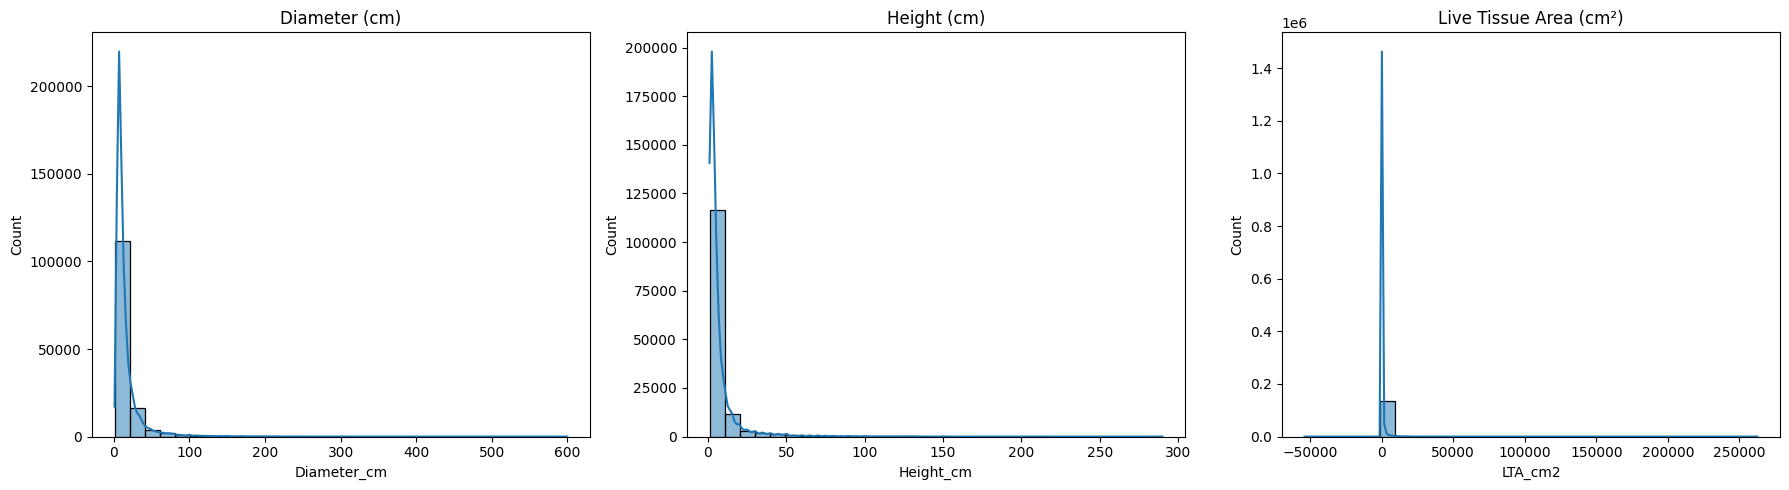

In [10]:
# 📊 3. Distribution of Coral Measurements

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Diameter_cm'], kde=True, ax=axs[0], bins=30).set_title("Diameter (cm)")
sns.histplot(data['Height_cm'], kde=True, ax=axs[1], bins=30).set_title("Height (cm)")
sns.histplot(data['LTA_cm2'], kde=True, ax=axs[2], bins=30).set_title("Live Tissue Area (cm²)")
plt.tight_layout()
plt.show()

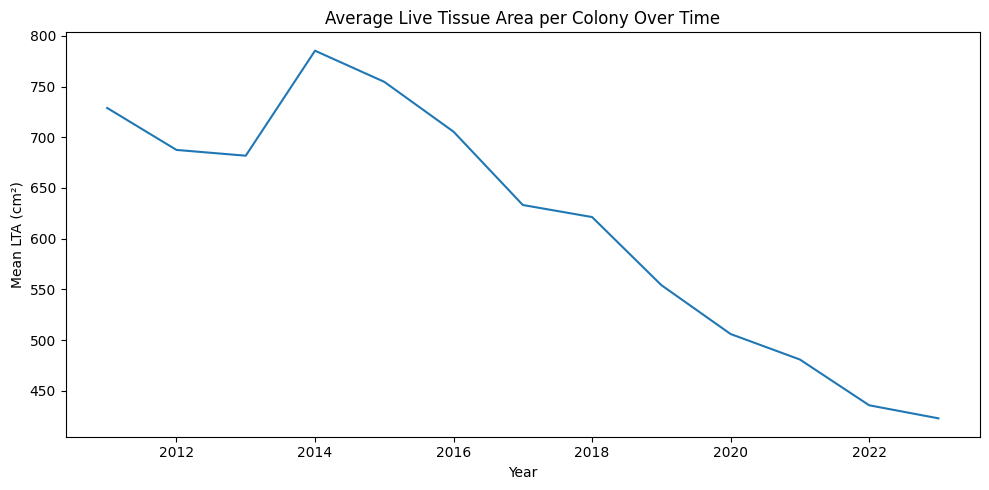

In [12]:
# 📈 Colony Size Over Time (LTA_cm2 by Year)

yearly = data.groupby('Year')['LTA_cm2'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly, x='Year', y='LTA_cm2')
plt.title("Average Live Tissue Area per Colony Over Time")
plt.ylabel("Mean LTA (cm²)")
plt.tight_layout()
plt.show()

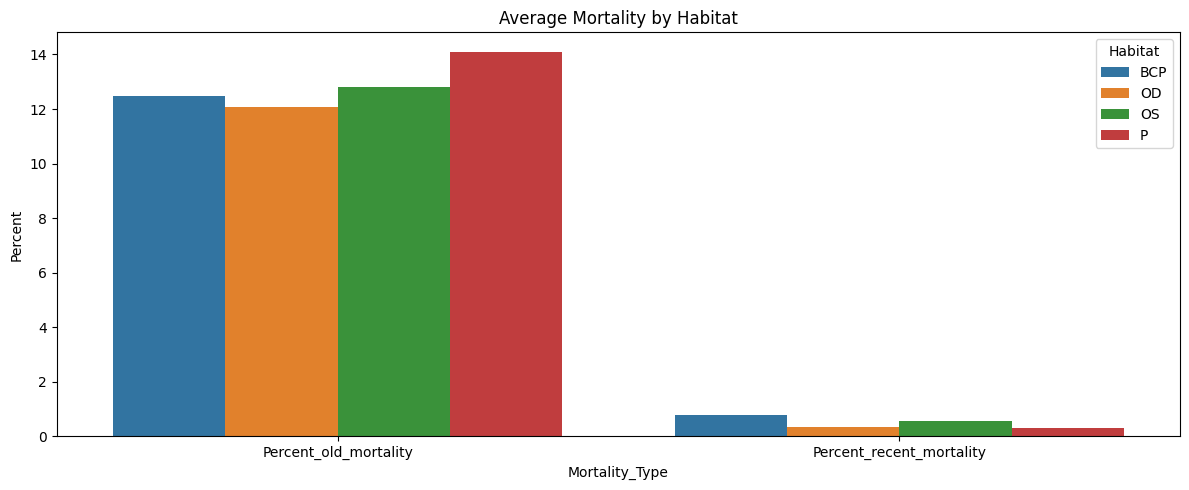

In [14]:
# 🎯 Mortality by Habitat

mortality_habitat = data.groupby('Habitat')[['Percent_old_mortality', 'Percent_recent_mortality']].mean().reset_index()
melted = mortality_habitat.melt(id_vars='Habitat', var_name='Mortality_Type', value_name='Percent')

plt.figure(figsize=(12, 5))
sns.barplot(data=melted, x='Mortality_Type', y='Percent', hue='Habitat')
plt.title("Average Mortality by Habitat")
plt.tight_layout()
plt.show()

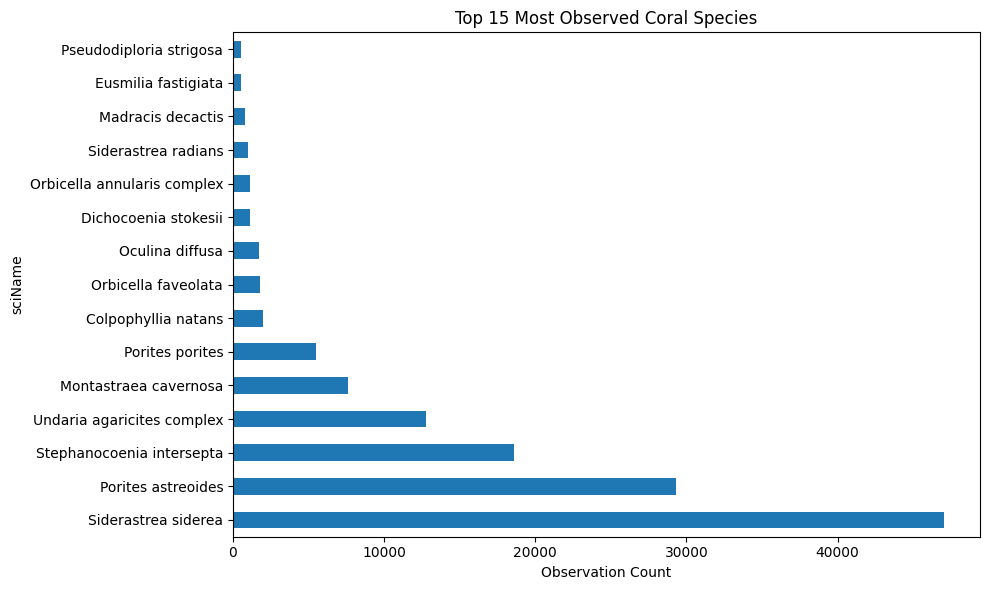

In [16]:
# 🧬 Top Species by Count

data['sciName'].value_counts().head(15).plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Most Observed Coral Species")
plt.xlabel("Observation Count")
plt.tight_layout()
plt.show()

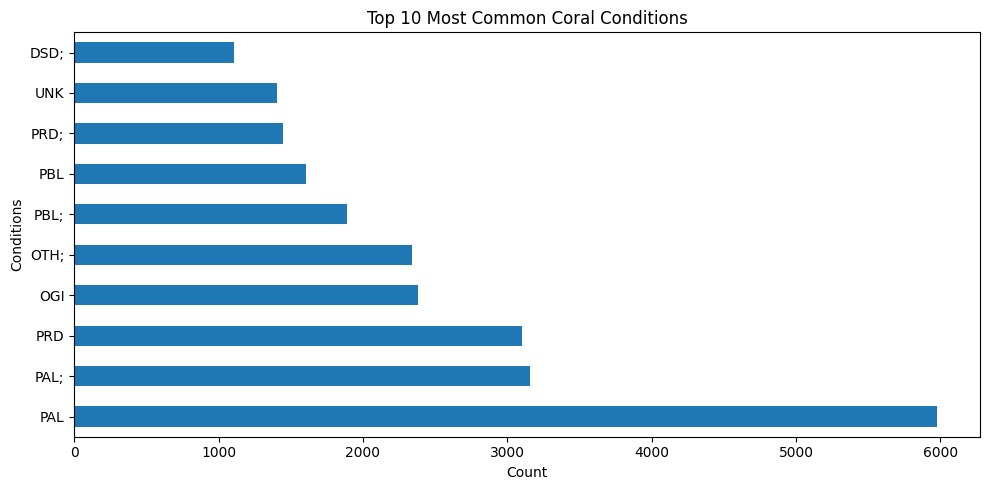

In [18]:
# 🌡️ Conditions Frequency (e.g., disease, bleaching)

data['Conditions'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.title("Top 10 Most Common Coral Conditions")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

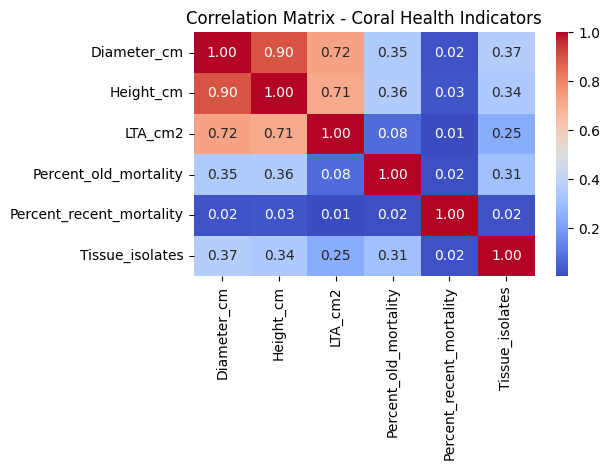

In [28]:
# 💡 Heatmap of Coral Health Indicators

health_cols = ['Diameter_cm', 'Height_cm', 'LTA_cm2', 
               'Percent_old_mortality', 'Percent_recent_mortality', 'Tissue_isolates']

corr_matrix = data[health_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix - Coral Health Indicators")
plt.tight_layout()
plt.show()

In [30]:
corr_matrix

,Diameter_cm,Height_cm,LTA_cm2,Percent_old_mortality,Percent_recent_mortality,Tissue_isolates
Diameter_cm,1.000000,0.897465,0.724524,0.353198,0.023558,0.368097
Height_cm,0.897465,1.000000,0.710222,0.358015,0.027526,0.344516
LTA_cm2,0.724524,0.710222,1.000000,0.076550,0.005028,0.245997
Percent_old_mortality,0.353198,0.358015,0.076550,1.000000,0.016170,0.309206
Percent_recent_mortality,0.023558,0.027526,0.005028,0.016170,1.000000,0.017493
Tissue_isolates,0.368097,0.344516,0.245997,0.309206,0.017493,1.000000


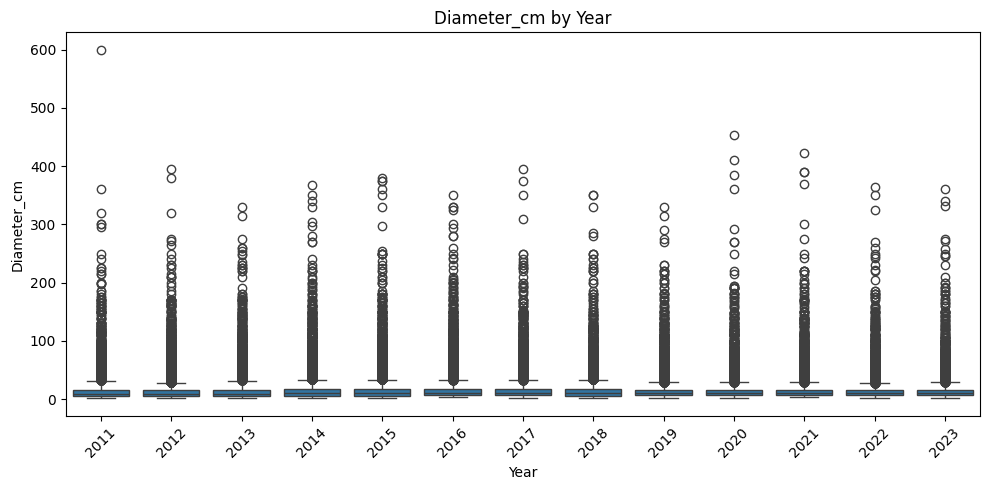

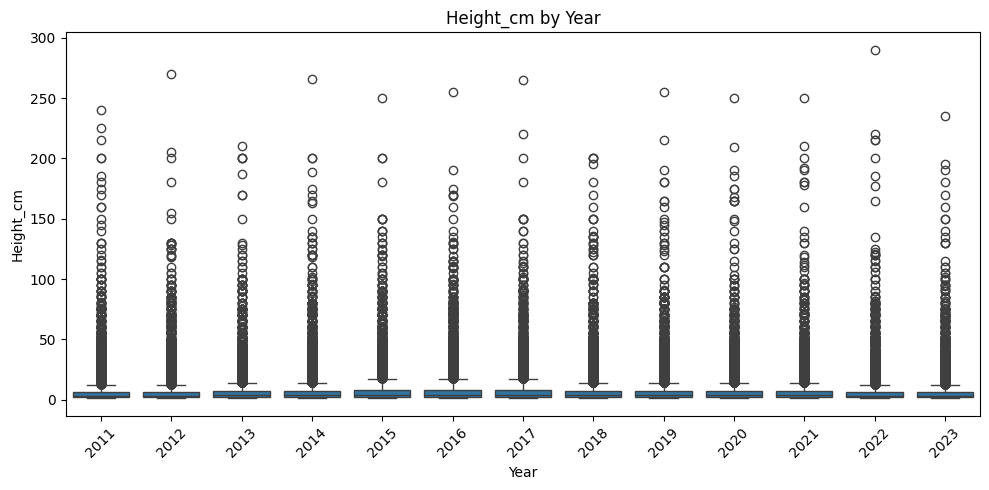

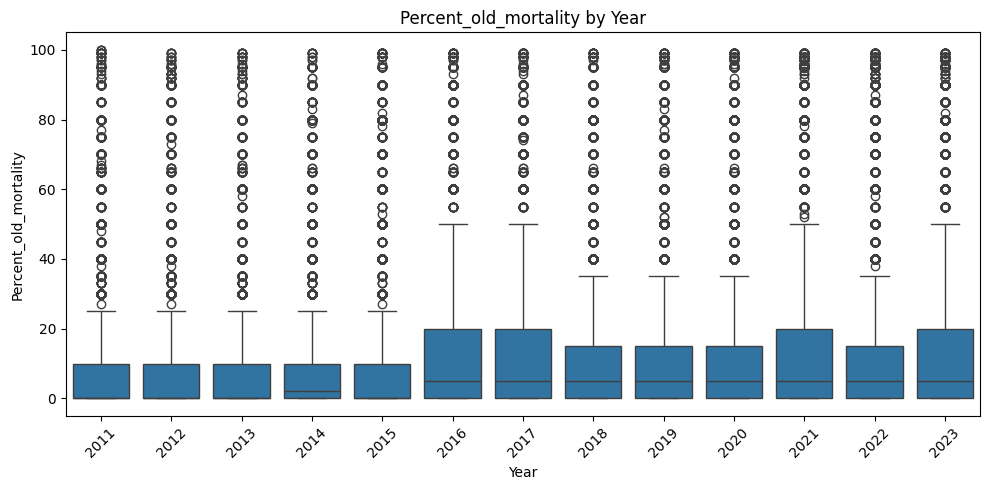

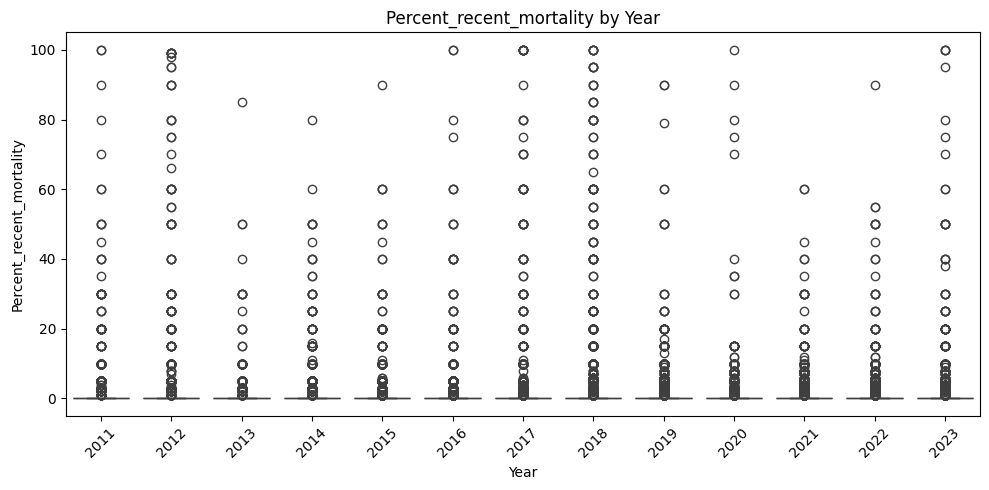

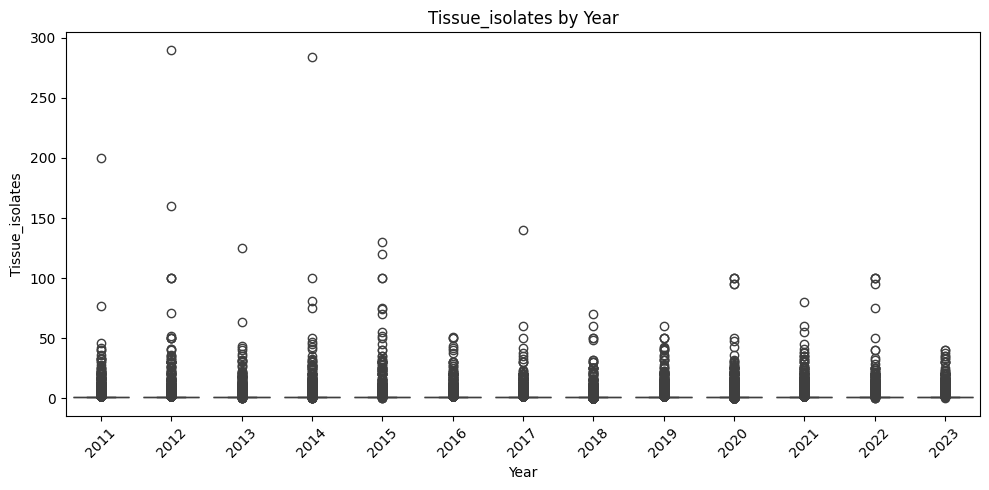

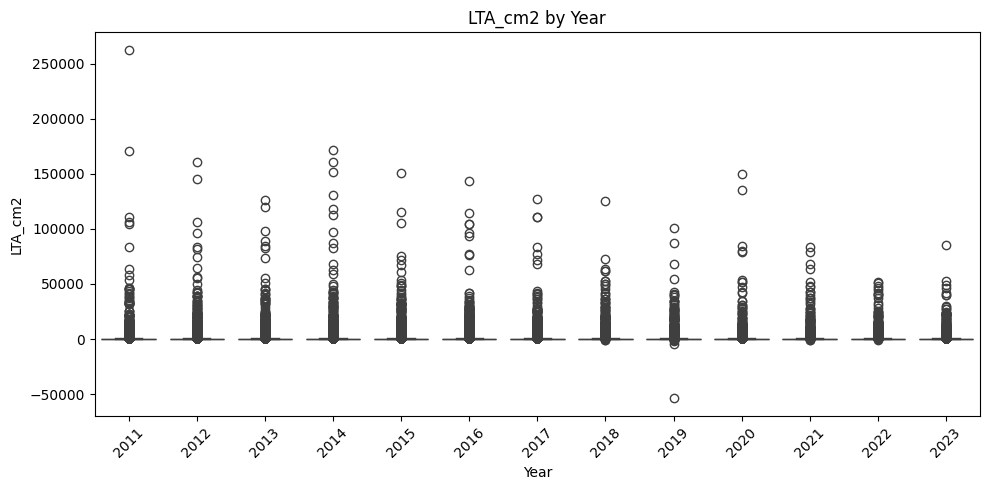

In [32]:
# 🌀 1. Health Metrics Over Time (Year)

metrics = ['Diameter_cm', 'Height_cm', 'Percent_old_mortality', 
           'Percent_recent_mortality', 'Tissue_isolates', 'LTA_cm2']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='Year', y=metric)
    plt.title(f"{metric} by Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

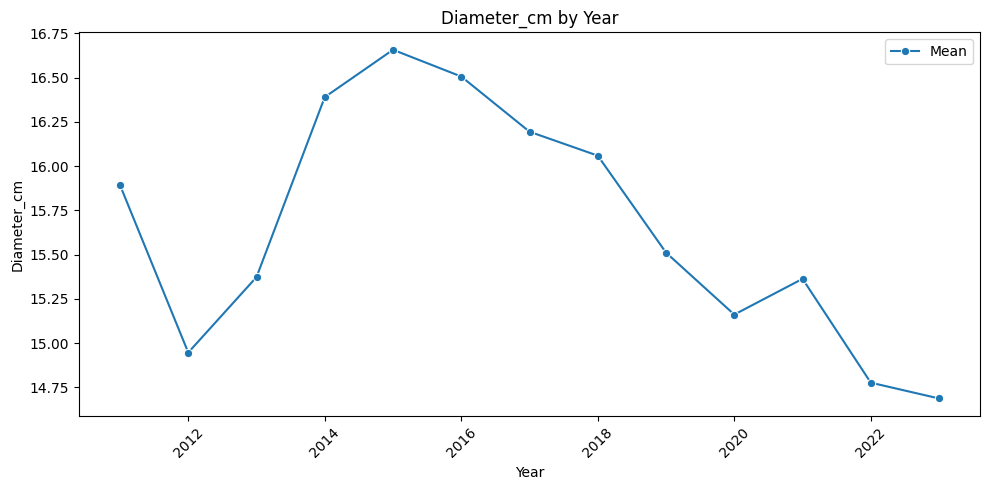

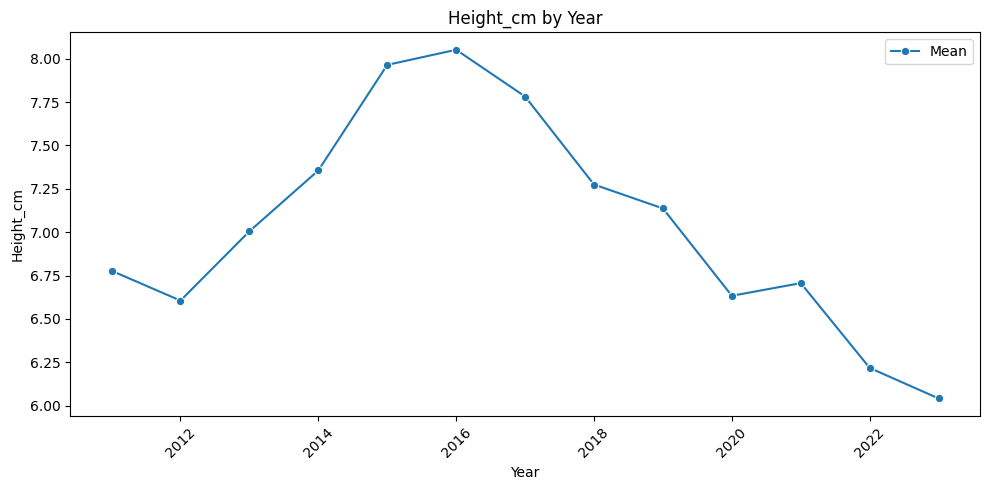

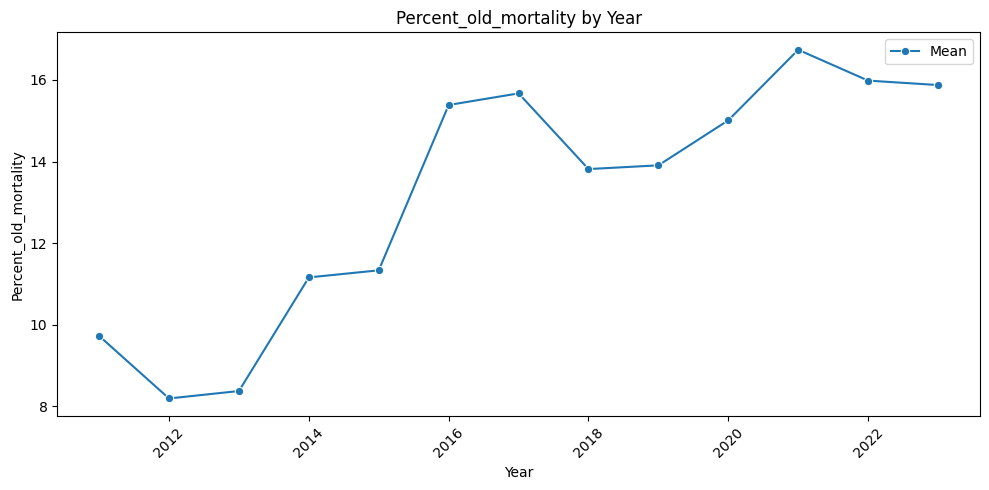

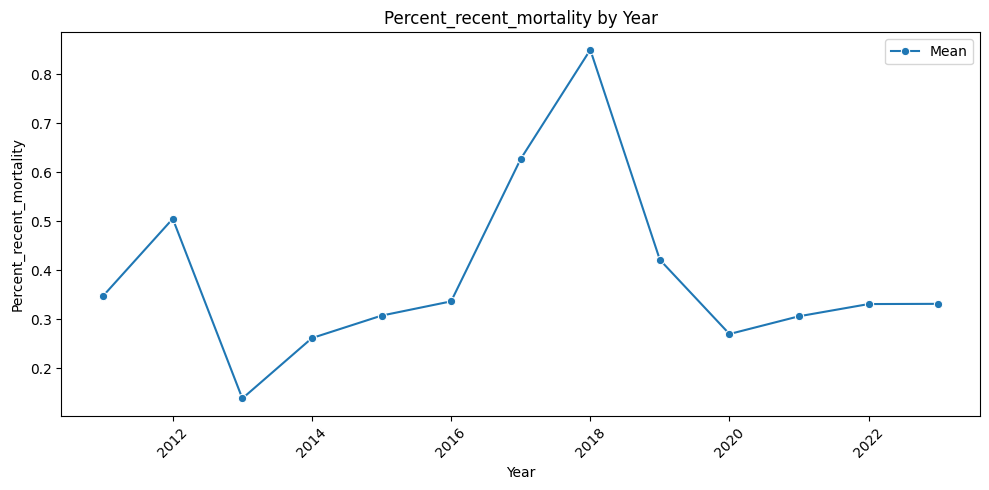

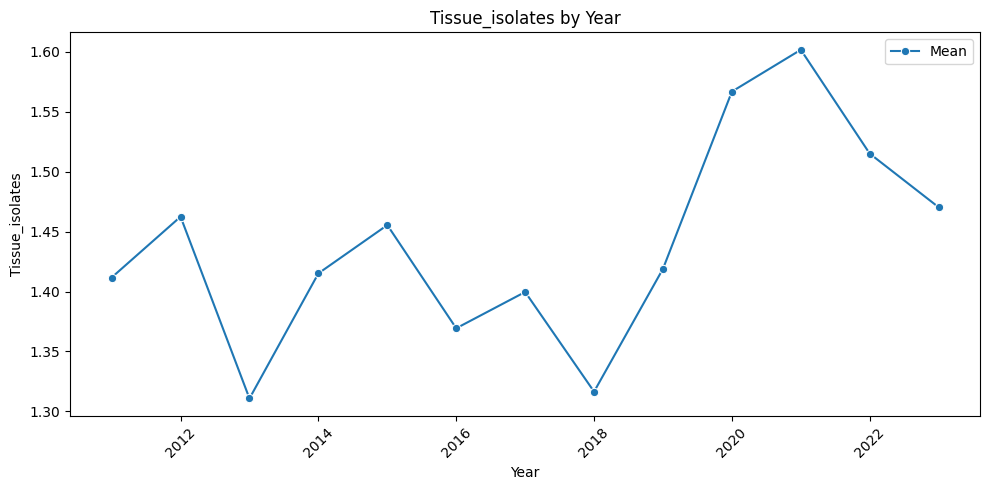

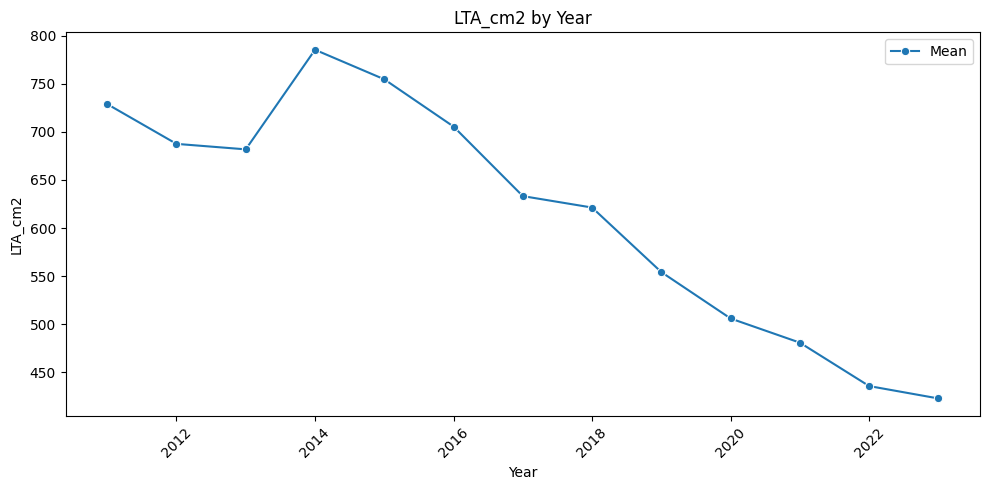

In [9]:
# 🌀 1. Health Metrics Over Time (Year) - Using Lineplot

metrics = ['Diameter_cm', 'Height_cm', 'Percent_old_mortality', 
           'Percent_recent_mortality', 'Tissue_isolates', 'LTA_cm2']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    
    # Group by Year and calculate mean and standard deviation
    yearly_stats = data.groupby('Year')[metric].agg(['mean', 'std']).reset_index()
    
    # Plot the mean as a lineplot
    sns.lineplot(data=yearly_stats, x='Year', y='mean', marker='o', label='Mean')
    plt.title(f"{metric} by Year")
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

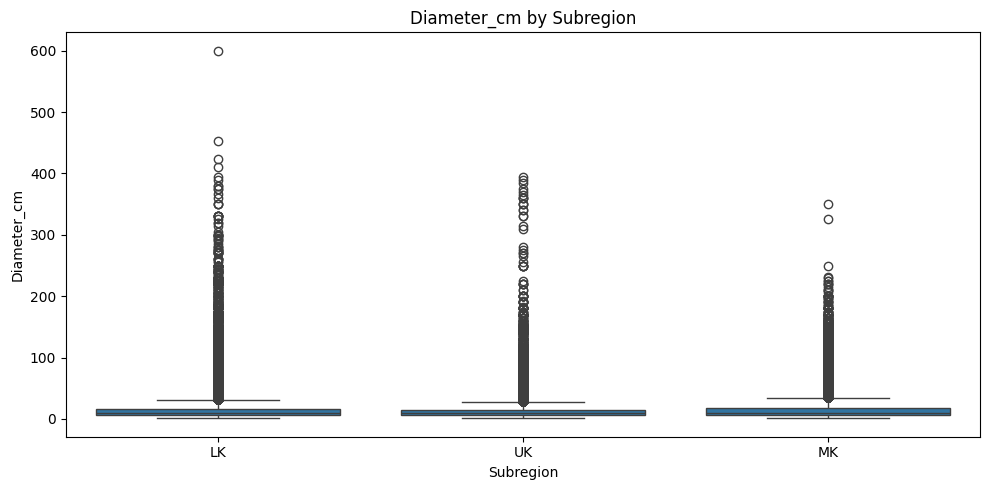

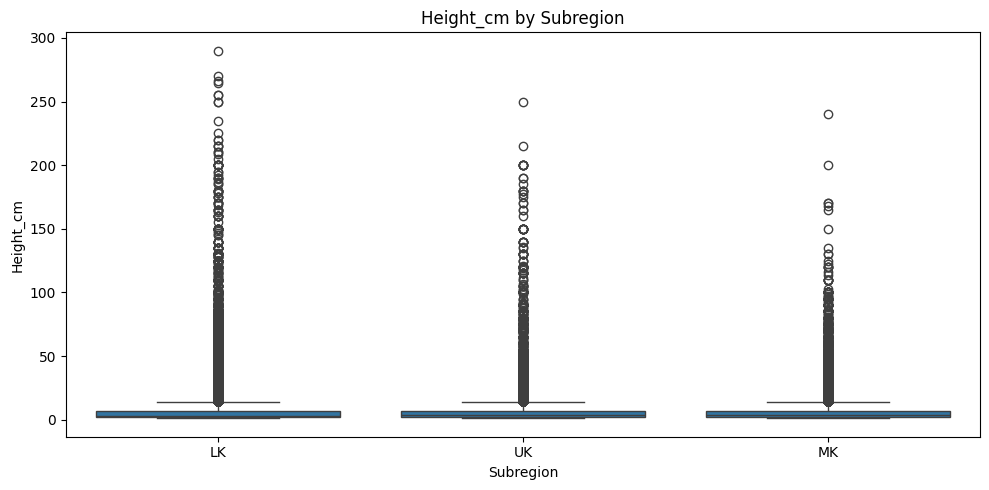

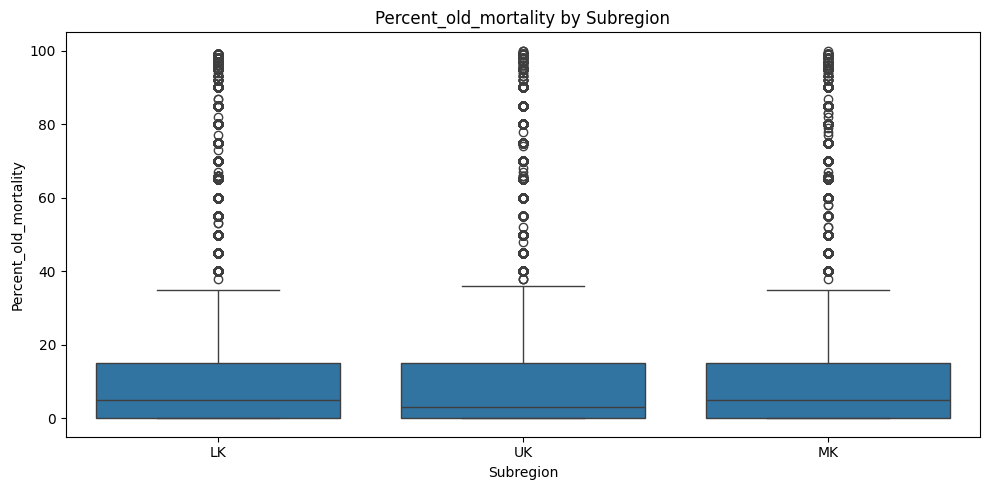

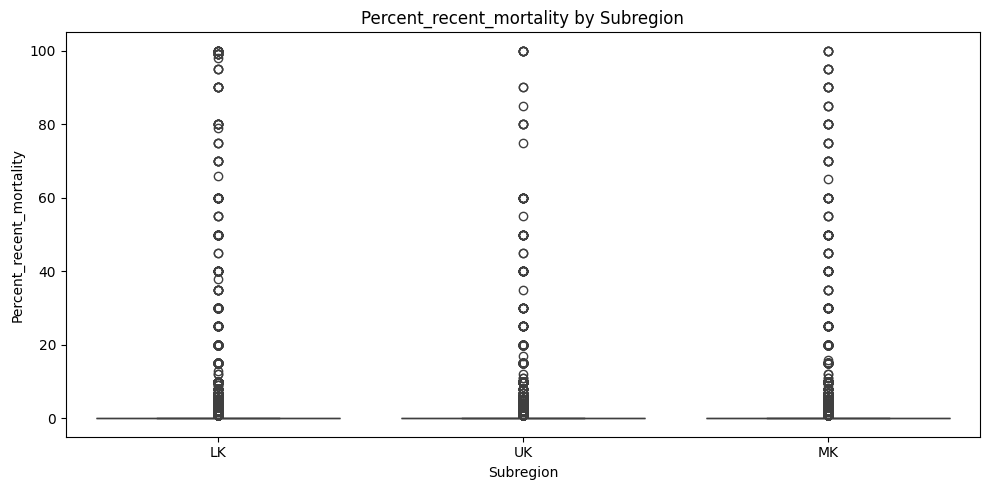

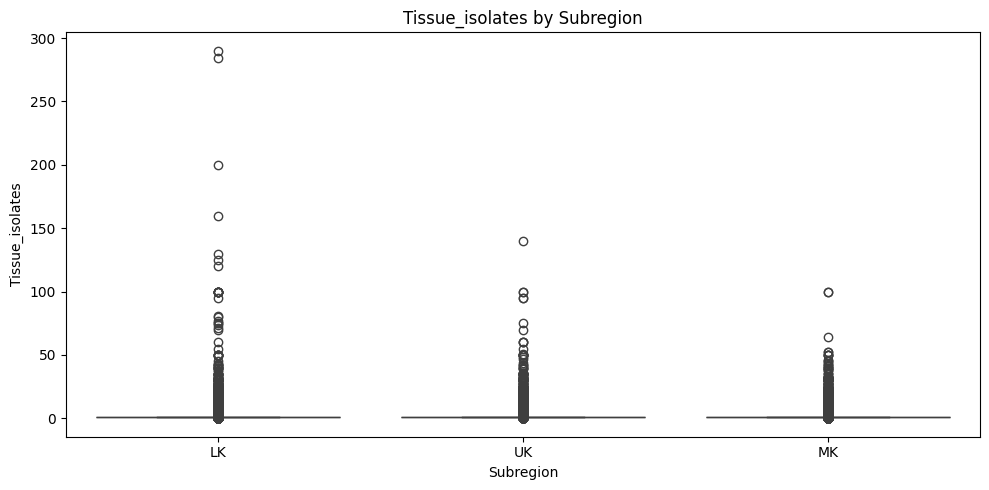

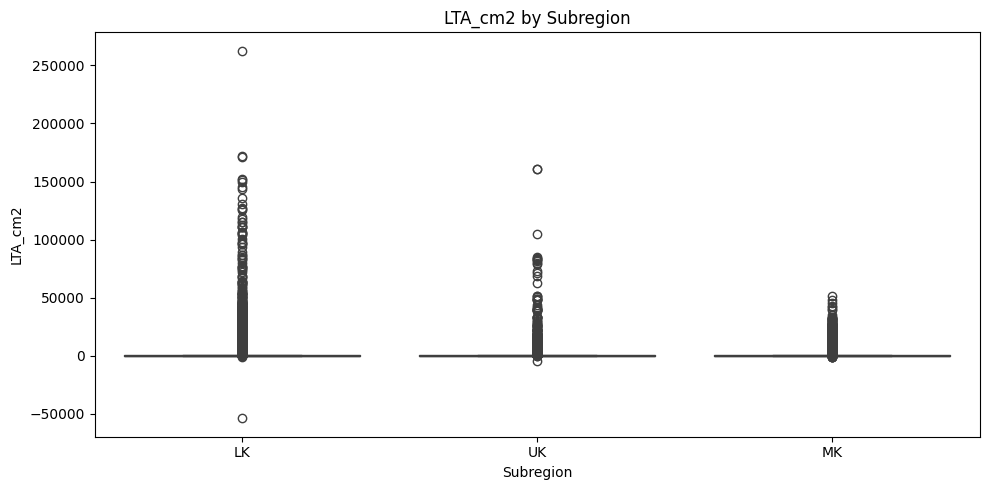

In [34]:
# 🗺️ 2. Metrics by Subregion

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='Subregion', y=metric)
    plt.title(f"{metric} by Subregion")
    plt.tight_layout()
    plt.show()

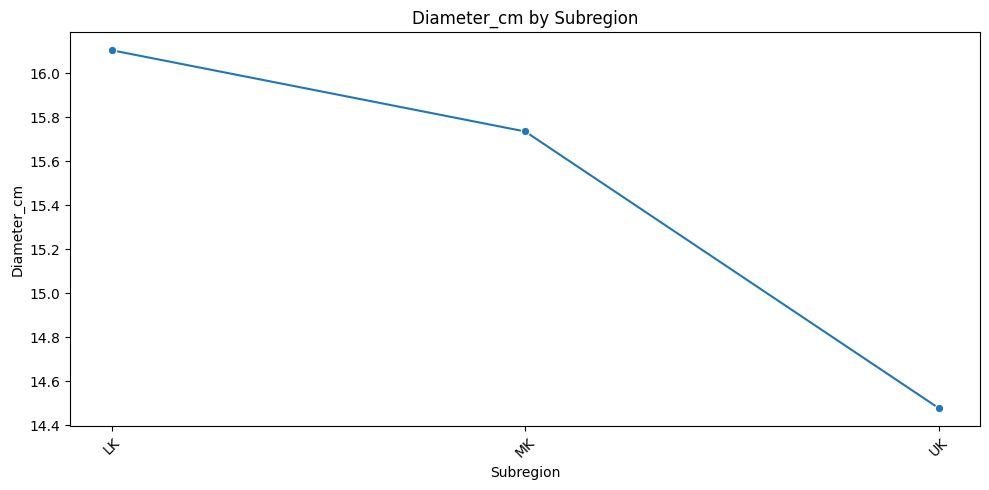

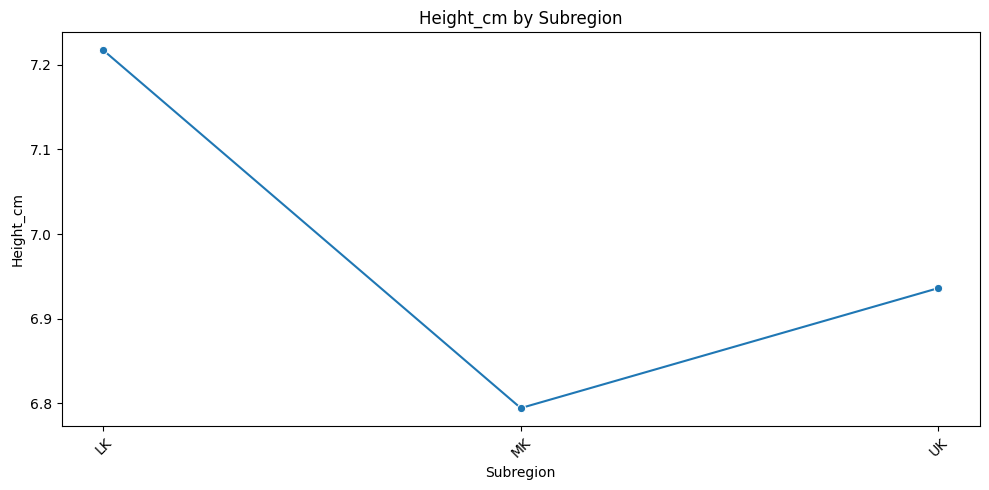

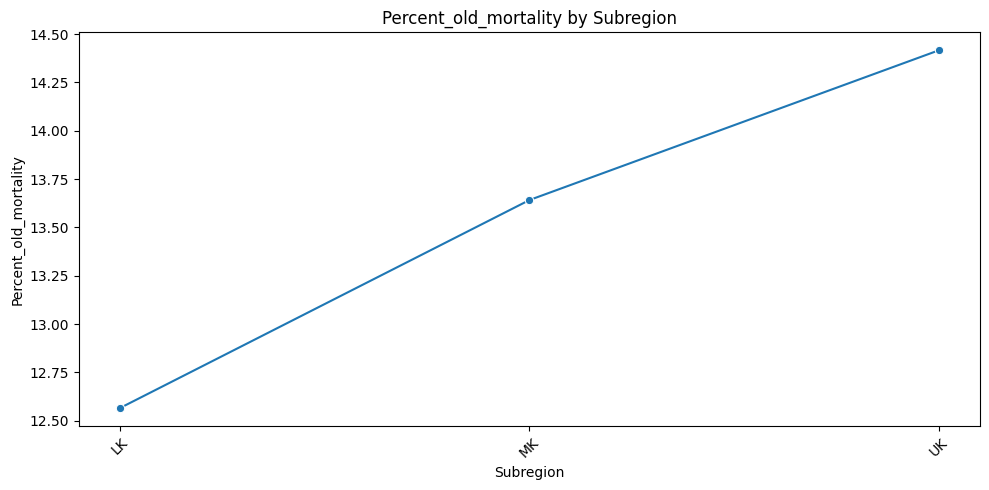

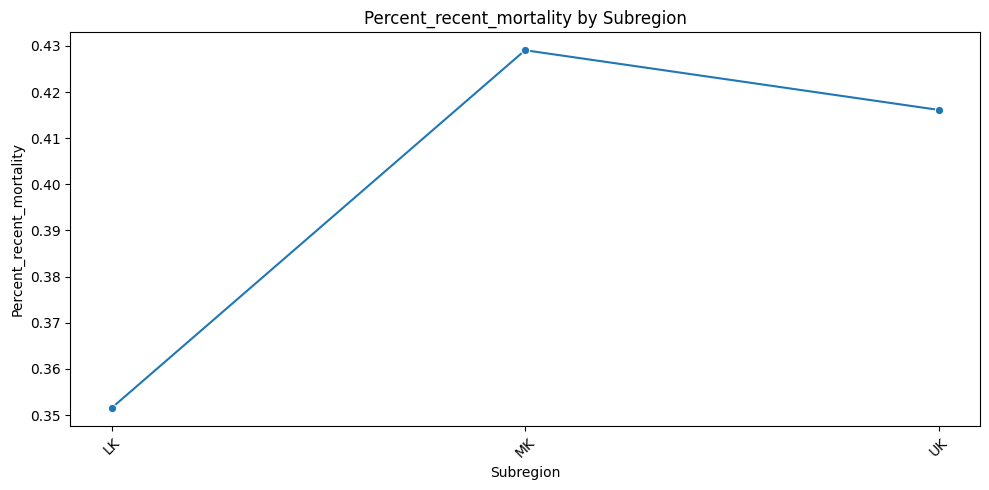

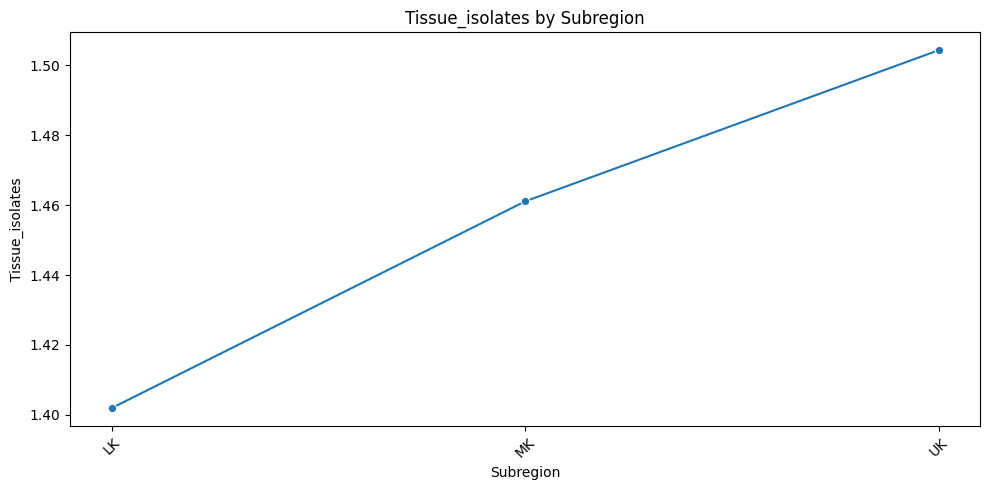

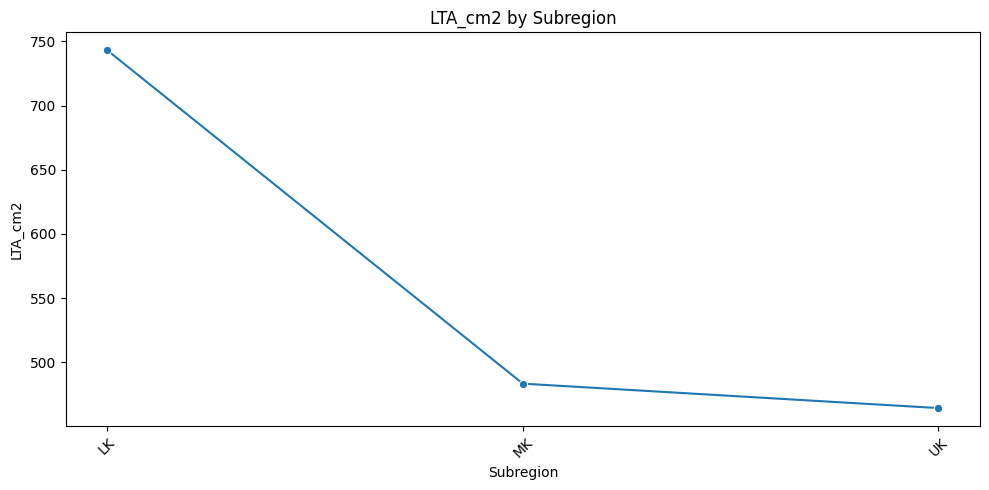

In [11]:
# 🗺️ 2. Metrics by Subregion - Using Lineplot

for metric in metrics:
    plt.figure(figsize=(10, 5))
    
    # Group by Subregion and calculate mean
    subregion_stats = data.groupby('Subregion')[metric].mean().reset_index()
    
    # Sort Subregions alphabetically or keep as is for custom order
    subregion_stats = subregion_stats.sort_values('Subregion')
    
    # Plot the lineplot
    sns.lineplot(data=subregion_stats, x='Subregion', y=metric, marker='o')
    
    plt.title(f"{metric} by Subregion")
    plt.xlabel("Subregion")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


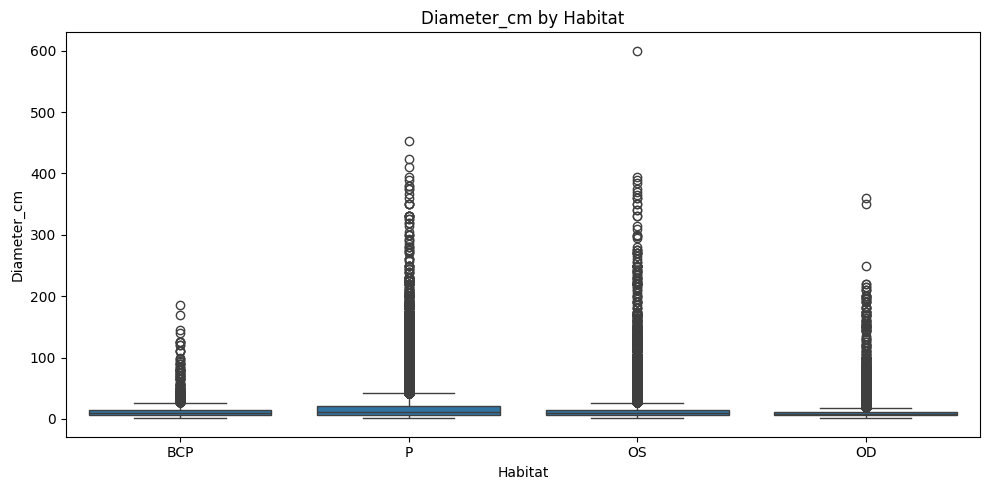

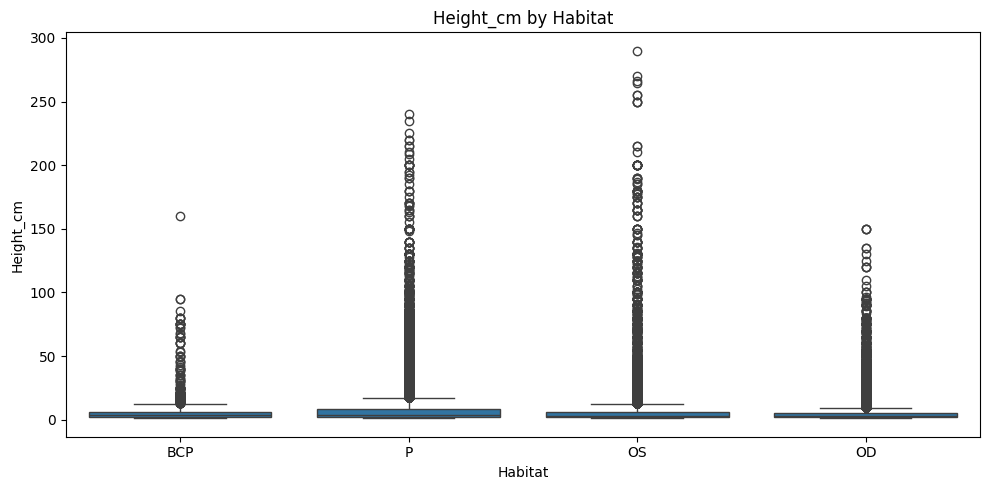

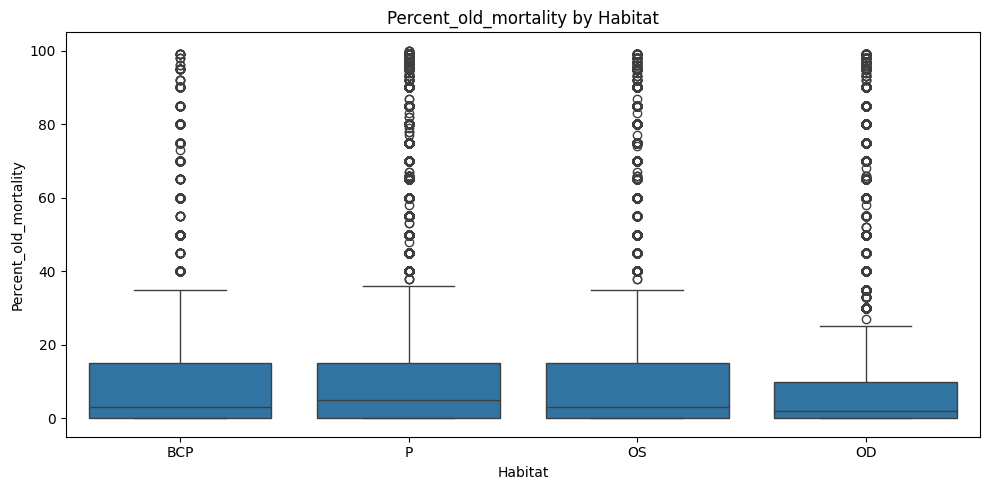

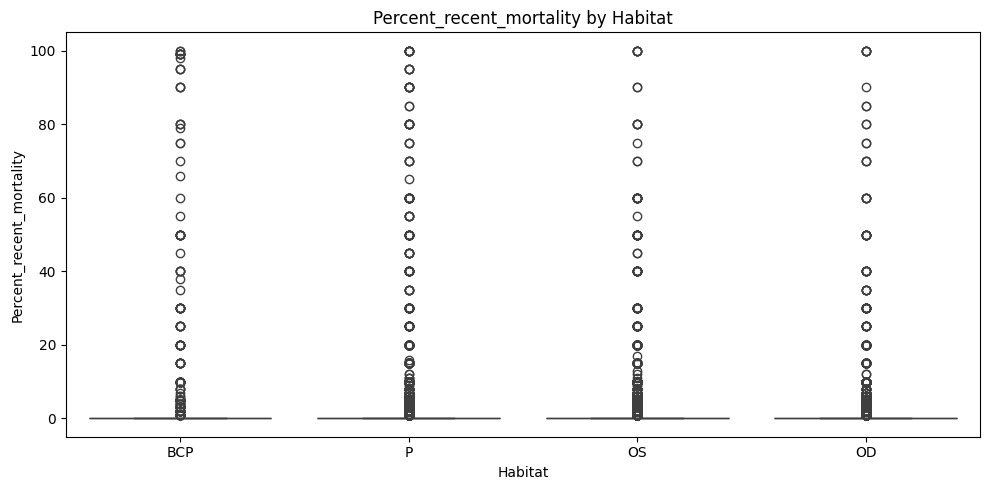

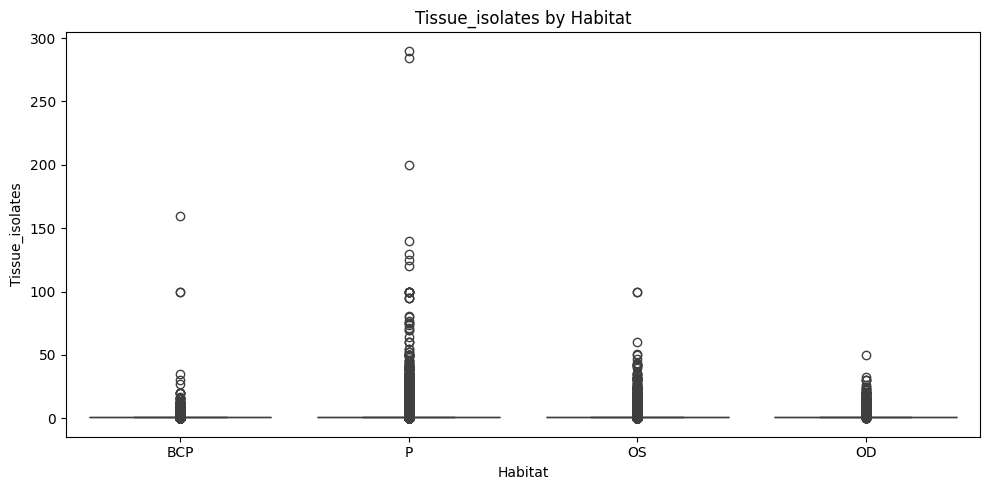

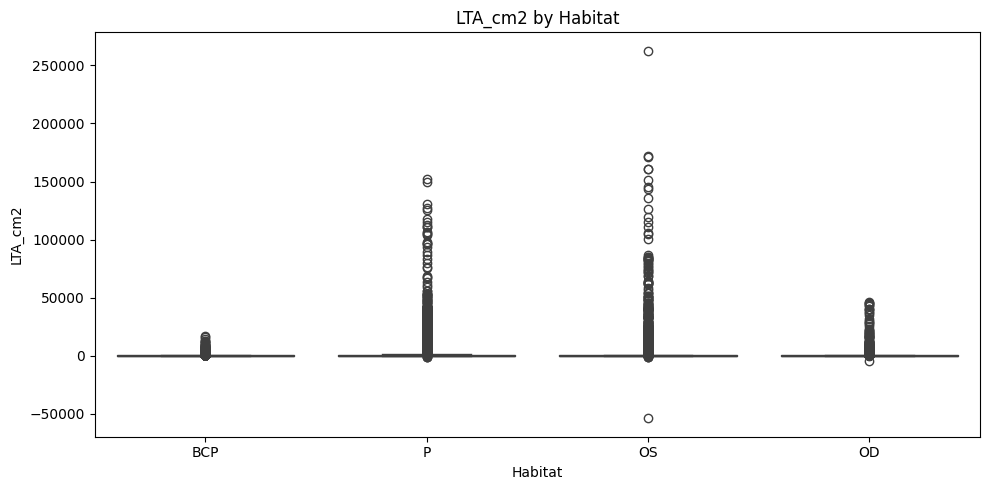

In [42]:
# 🏝️  Metrics by Habitat

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='Habitat', y=metric)
    plt.title(f"{metric} by Habitat")
    plt.tight_layout()
    plt.show()

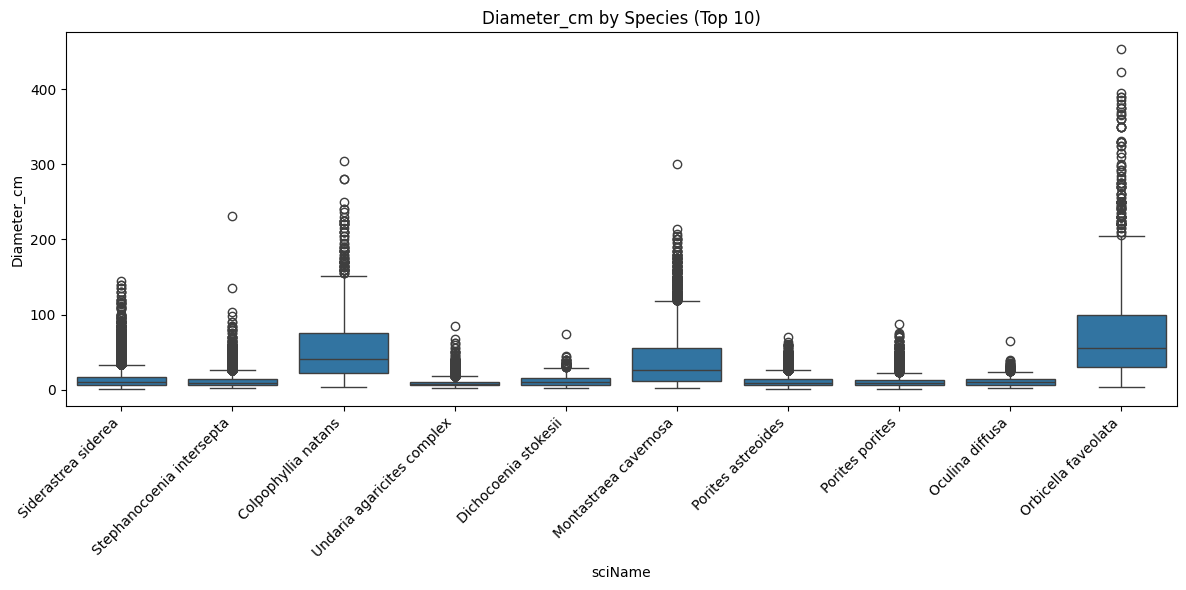

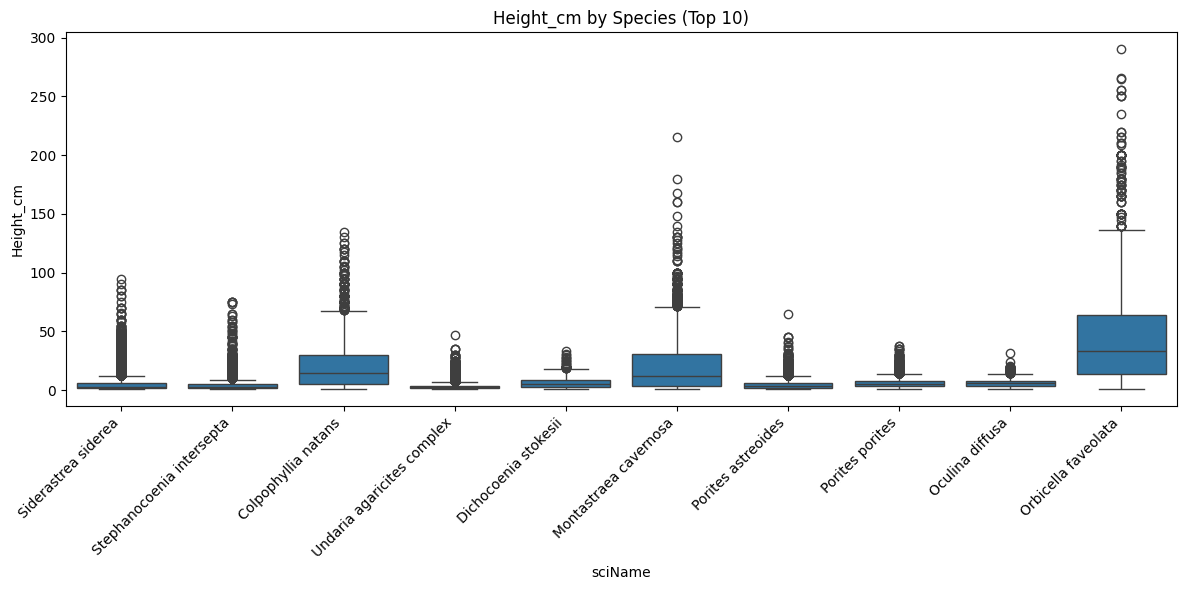

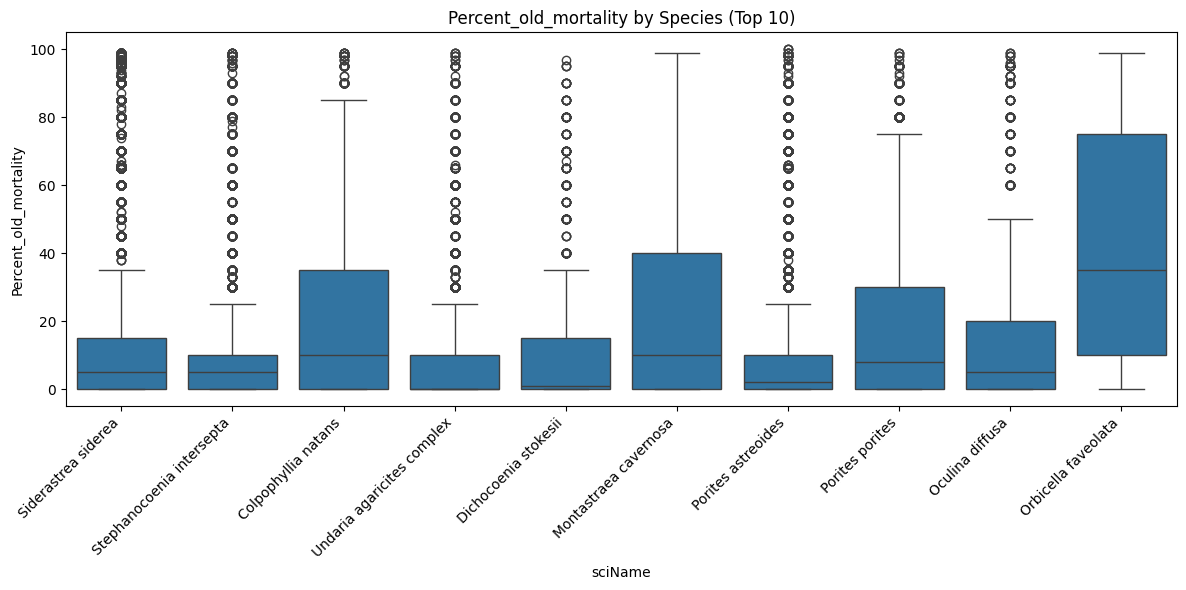

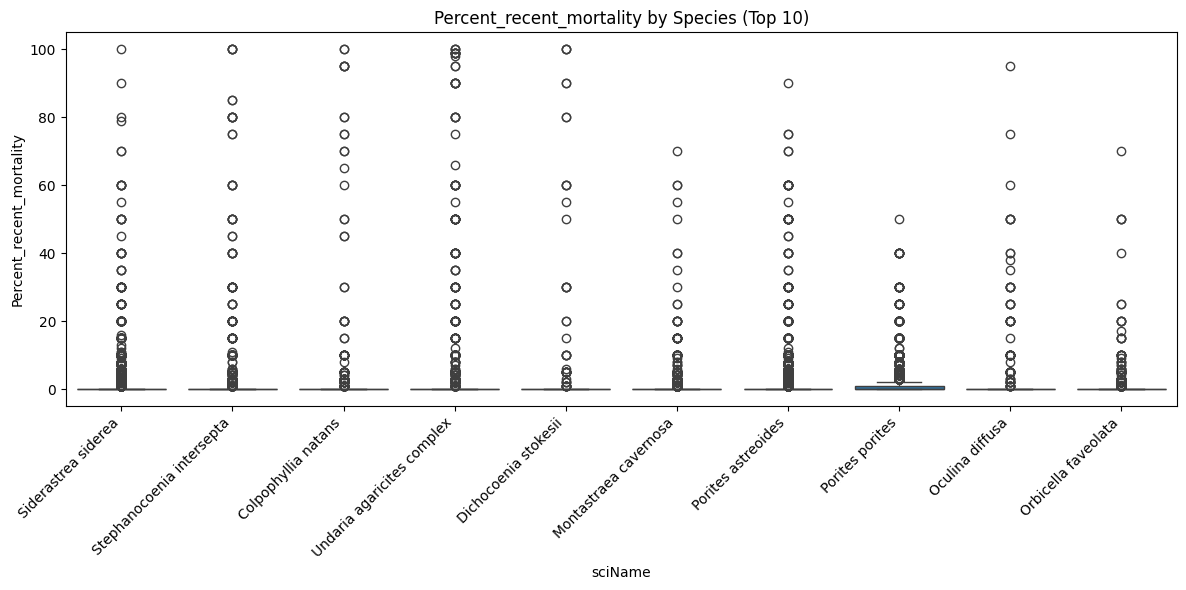

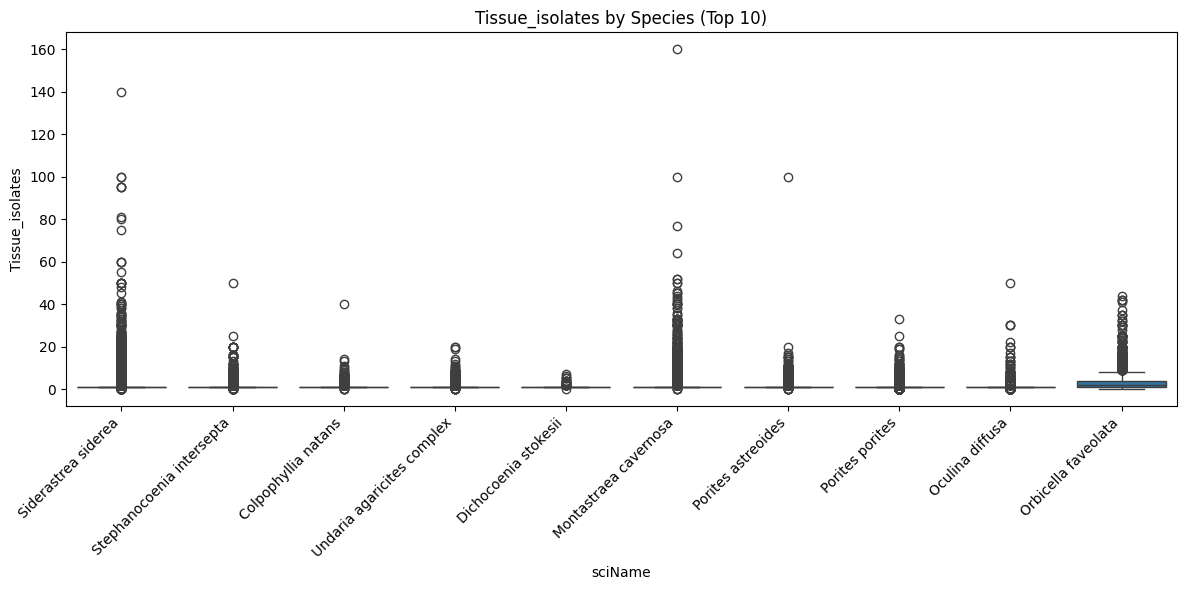

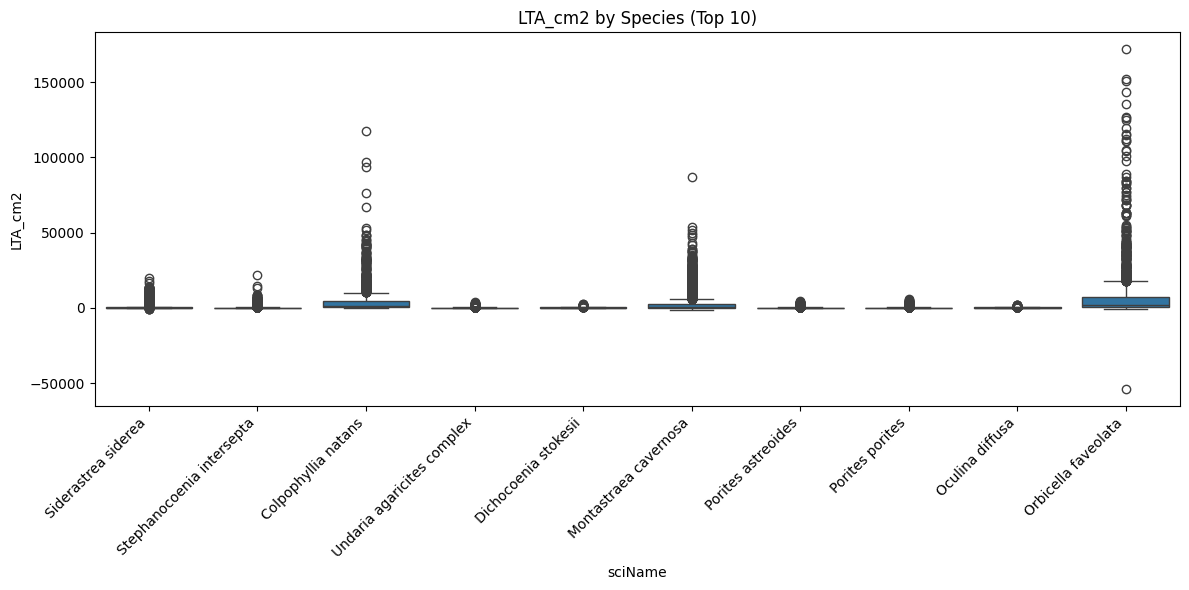

In [44]:
# 🧬  Metrics by Species (sciName)

top_species = data['sciName'].value_counts().nlargest(10).index
subset = data[data['sciName'].isin(top_species)]

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=subset, x='sciName', y=metric)
    plt.title(f"{metric} by Species (Top 10)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

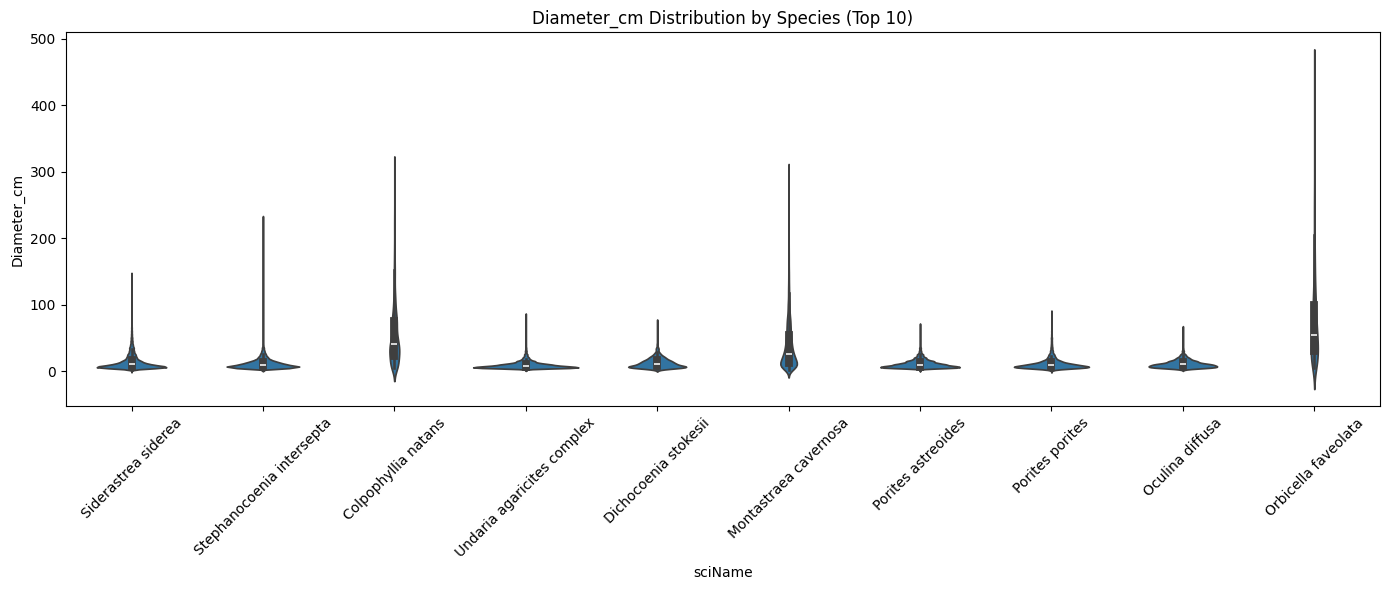

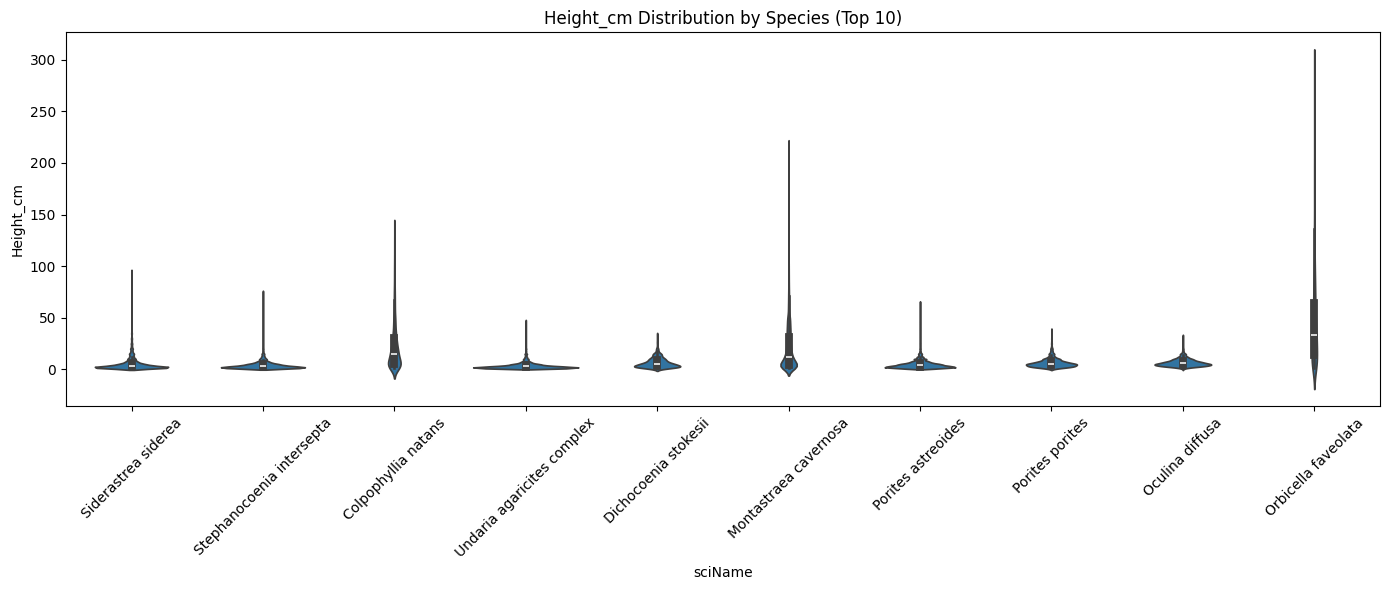

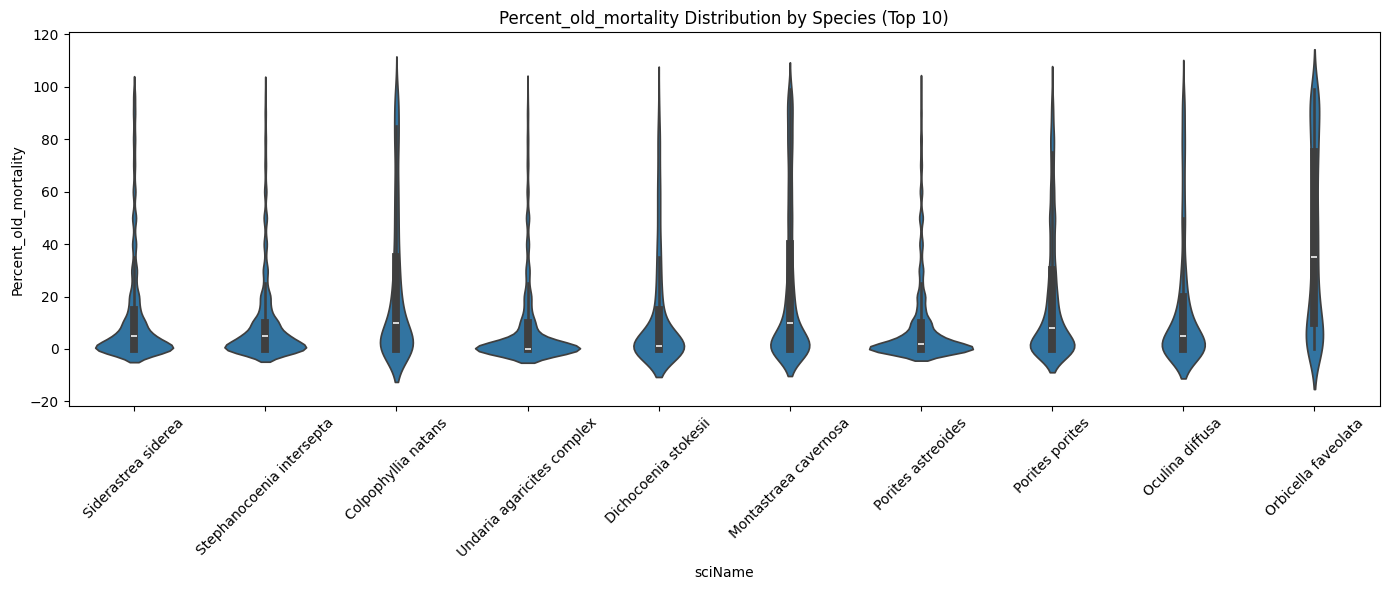

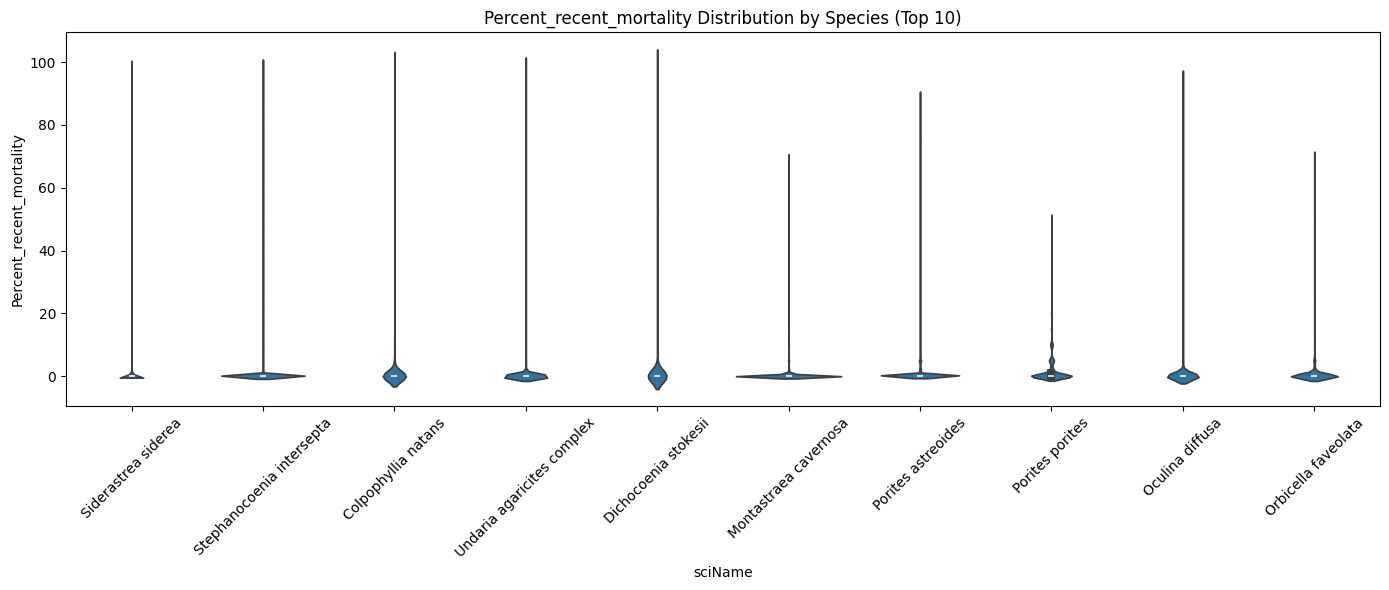

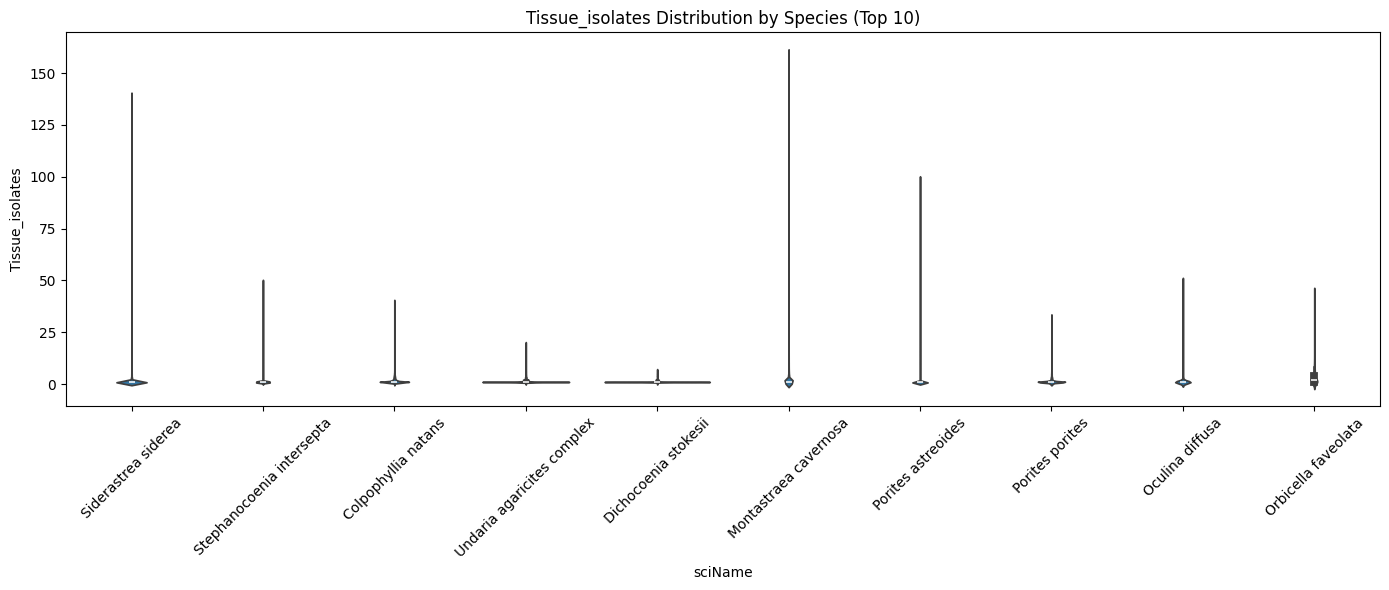

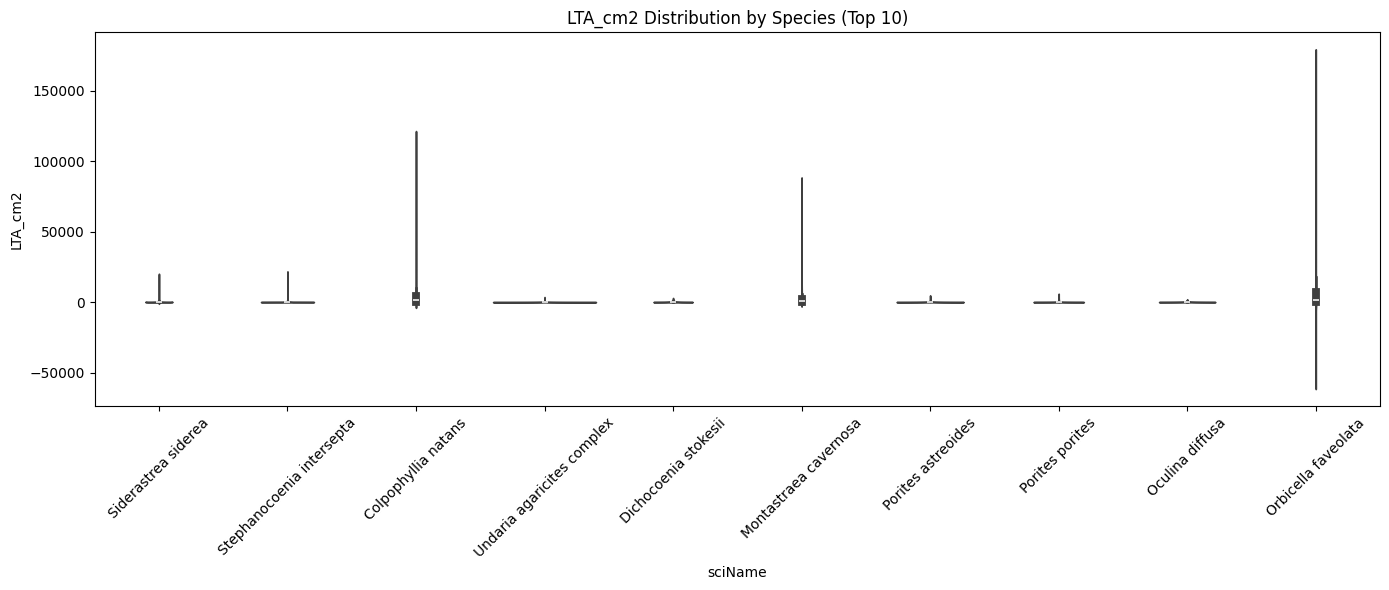

In [40]:
# Violinplots by Species (Top 10)

top_species = data['sciName'].value_counts().head(10).index
filtered = data[data['sciName'].isin(top_species)]

for var in metrics:
    plt.figure(figsize=(14, 6))
    sns.violinplot(data=filtered, x='sciName', y=var, inner='box')
    plt.title(f"{var} Distribution by Species (Top 10)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

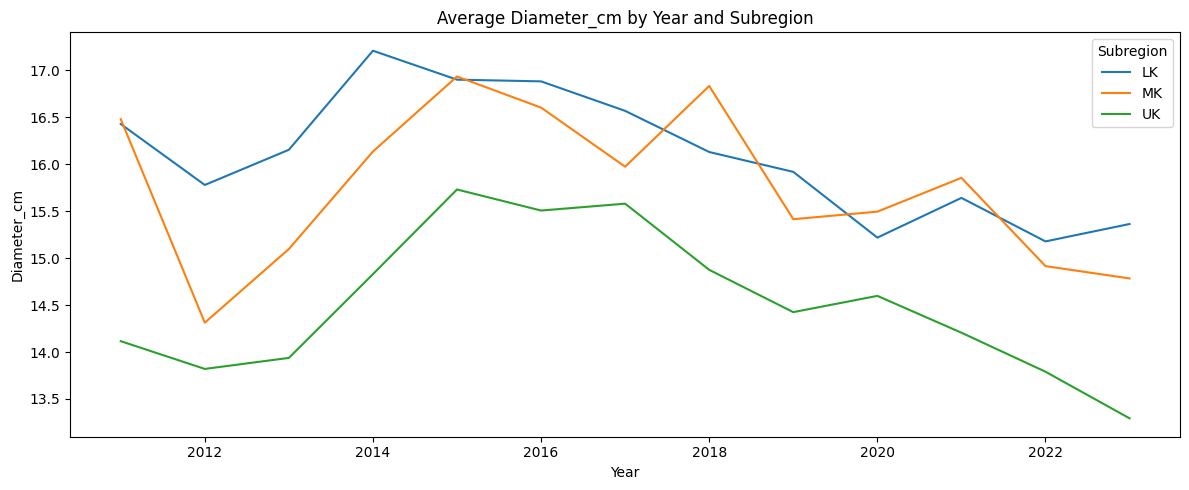

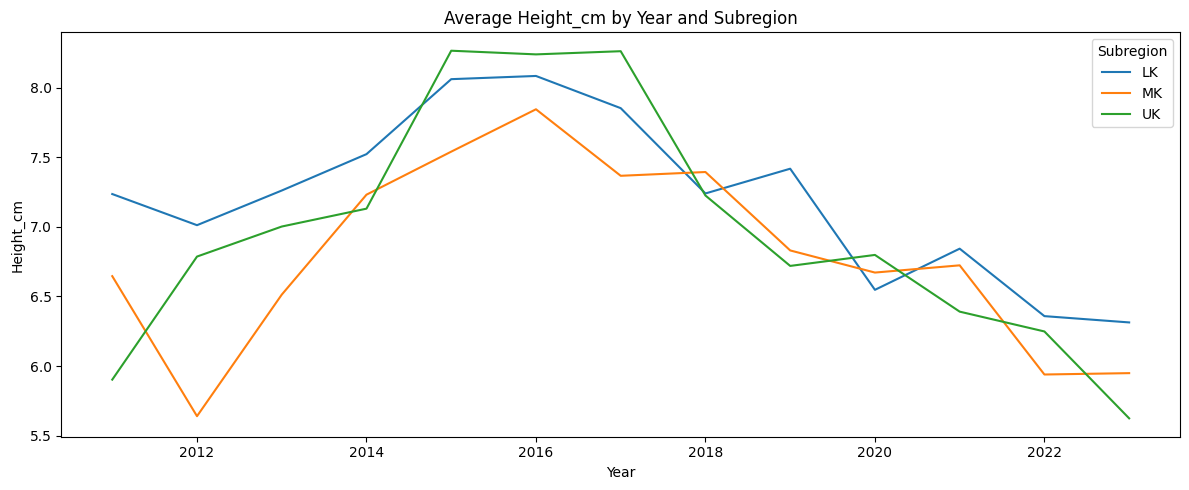

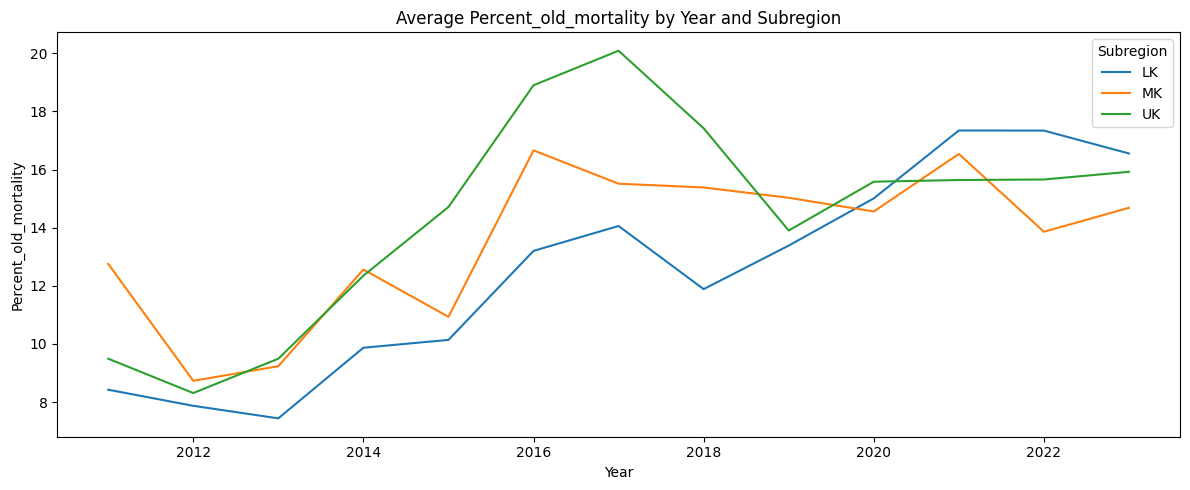

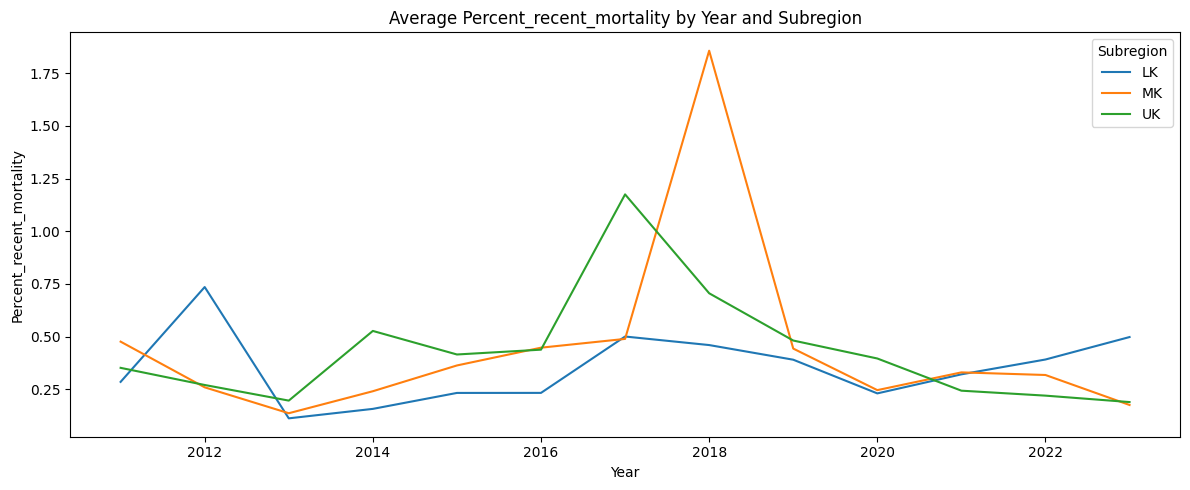

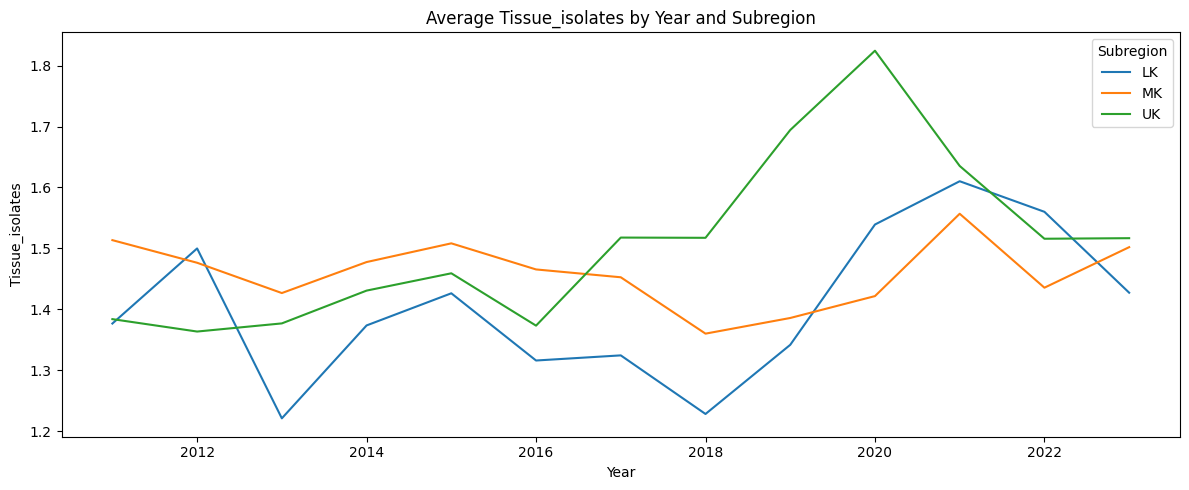

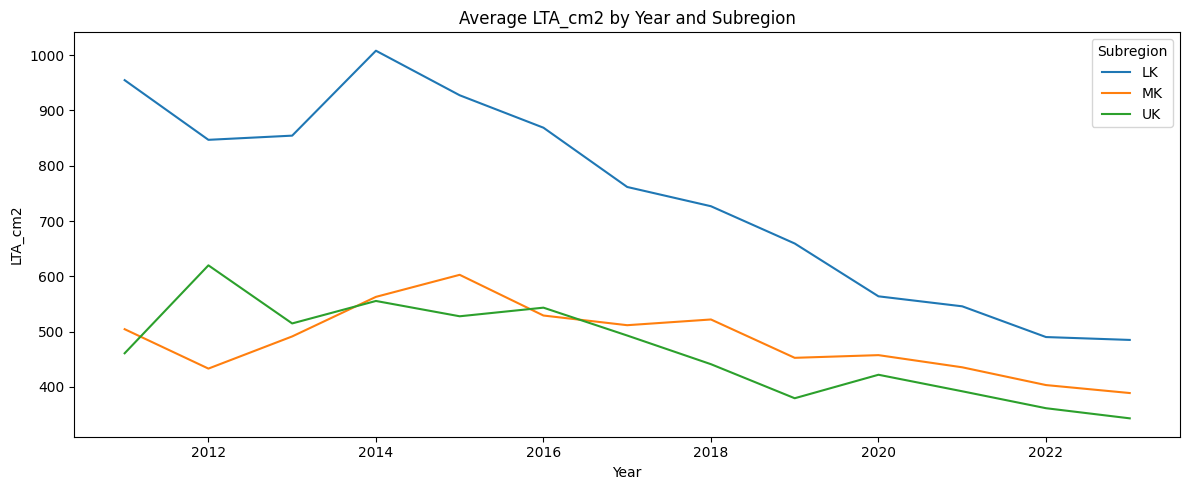

In [46]:
# 🧩 Bonus: Trends Across Multiple Dimensions (Year + Subregion/Habitat)

grouped = data.groupby(['Year', 'Subregion'])[metrics].mean().reset_index()

for metric in metrics:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=grouped, x='Year', y=metric, hue='Subregion')
    plt.title(f"Average {metric} by Year and Subregion")
    plt.tight_layout()
    plt.show()

In [48]:
# Statistical Testing

from scipy.stats import kruskal

for metric in metrics:
    groups = [group[metric].dropna() for name, group in data.groupby('Habitat')]
    stat, p = kruskal(*groups)
    print(f"{metric} across Habitats → p-value: {p:.4f}")

Diameter_cm across Habitats → p-value: 0.0000
Height_cm across Habitats → p-value: 0.0000
Percent_old_mortality across Habitats → p-value: 0.0000
Percent_recent_mortality across Habitats → p-value: 0.0000
Tissue_isolates across Habitats → p-value: 0.0000
LTA_cm2 across Habitats → p-value: 0.0000


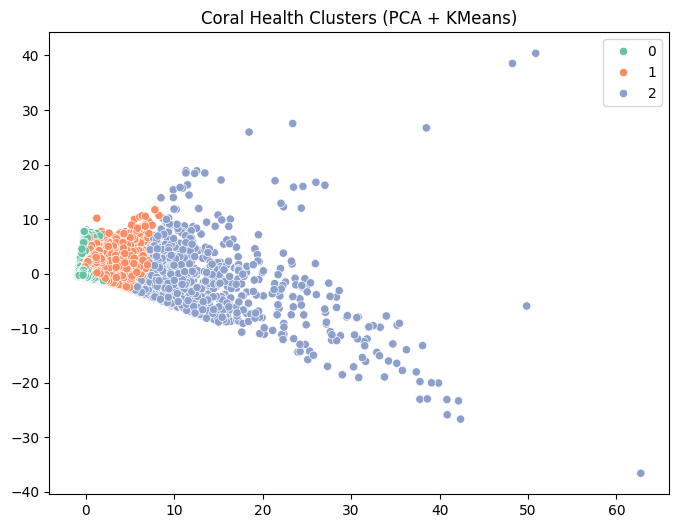

In [52]:
# Clustering Corals by Health Profiles

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features = data[metrics].dropna()
scaled = StandardScaler().fit_transform(features)

# Reduce to 2D for visualization
pca = PCA(n_components=2).fit_transform(scaled)

# Cluster
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title("Coral Health Clusters (PCA + KMeans)")
plt.show()

In [60]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=metrics)
print(cluster_centers)

   Diameter_cm  Height_cm  Percent_old_mortality  Percent_recent_mortality  \
0    -0.219901  -0.219416              -0.349690                 -0.009848   
1     0.774055   0.768344               1.921208                  0.048004   
2     6.221291   6.256611               1.430657                  0.115107   

   Tissue_isolates   LTA_cm2  
0        -0.134067 -0.114582  
1         0.516729  0.200976  
2         3.243576  5.722355  


<Axes: title={'center': 'Year-over-Year Change in Recent Mortality by Subregion'}, xlabel='Year'>

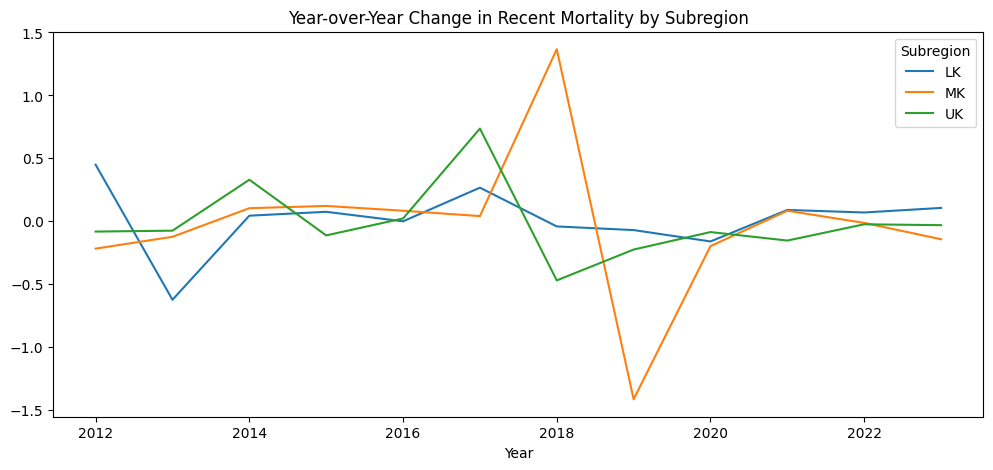

In [54]:
# Time-Series Change Detection

rate_change = data.groupby(['Year', 'Subregion'])['Percent_recent_mortality'].mean().unstack()
rate_change.diff().plot(figsize=(12, 5), title='Year-over-Year Change in Recent Mortality by Subregion')

In [56]:
# Species Vulnerability Index

species_stats = data.groupby('sciName')[
    ['Percent_recent_mortality', 'LTA_cm2', 'Diameter_cm']
].mean().copy()

species_stats['vulnerability_score'] = (
    species_stats['Percent_recent_mortality'] - 
    species_stats['LTA_cm2'].rank(ascending=False) -
    species_stats['Diameter_cm'].rank(ascending=False)
)
species_stats.sort_values('vulnerability_score', ascending=False).head(10)

,Percent_recent_mortality,LTA_cm2,Diameter_cm,vulnerability_score
sciName,,,,
Acropora palmata,1.972727,9259.372000,80.609091,-1.027273
Dendrogyra cylindrus,1.250000,8037.687500,89.500000,-1.750000
Orbicella faveolata,0.613938,8030.380713,76.306969,-5.386062
Orbicella annularis complex,0.704485,6187.202392,62.704485,-7.295515
Colpophyllia natans,0.944721,4231.070204,52.882470,-9.055279
Orbicella franksi,0.537267,3300.687453,52.708075,-11.462733
Montastraea cavernosa,0.238240,2472.386739,37.923574,-14.761760
Mycetophyllia sp,0.000000,3034.800000,32.500000,-16.000000
Scleractinia,0.000000,1117.902500,34.750000,-18.000000


C:\Users\yunus\AppData\Local\Temp\ipykernel_15620\1809276072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vulnerability_score', y=species_stats_sorted.index, data=species_stats_sorted, palette='coolwarm')


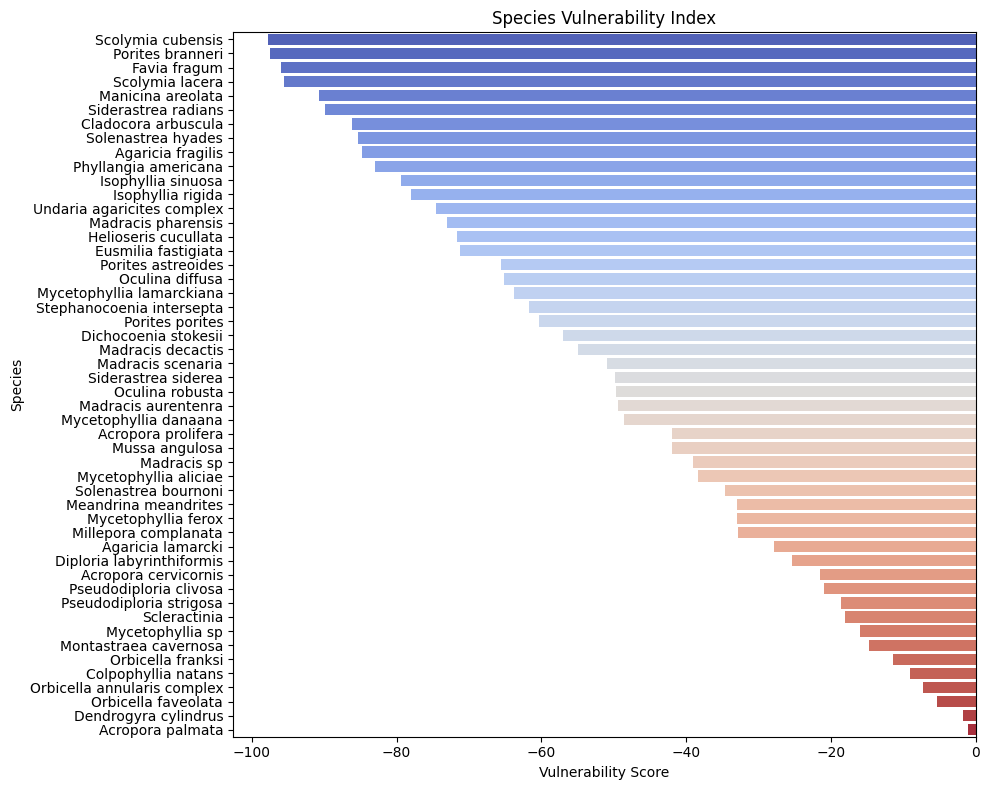

In [62]:
# Sort the species by vulnerability score
species_stats_sorted = species_stats.sort_values('vulnerability_score', ascending=True)

# Plot horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='vulnerability_score', y=species_stats_sorted.index, data=species_stats_sorted, palette='coolwarm')
plt.title('Species Vulnerability Index')
plt.xlabel('Vulnerability Score')
plt.ylabel('Species')
plt.tight_layout()
plt.show()
